# Analysis of ChIP-seq simulation

See `chips` folder for scripts.


In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import os

import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
sns.set_style("whitegrid")
import tempfile
import numpy as np

In [4]:
PATH = os.path.expanduser('~/data/2023_chips')
N = 5
MULTIPLIERS = [1.0, 0.7, 0.5, 0.2, 0.1]

FIGURES_DIR = f'{PATH}/pics'
! mkdir -p {FIGURES_DIR}
! rm {FIGURES_DIR}/*

rm: cannot remove '/home/jetbrains/data/2023_chips/pics/*': No such file or directory


# Chips models analysis

In [5]:
import json

models_df = pd.DataFrame(columns=['Modification', 'Model', 'k', 'theta', 'prc_rate', 'f', 's'],
                         dtype=object)
for modification in ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3']:
    path = os.path.join(PATH, 'models', f'{modification}.json')
    with open(path) as f:
        m = json.load(f)
        k, theta, prc_rate, f, s = m['frag']['k'], m['frag']['theta'], m['pcr_rate'], \
            m['pulldown']['f'], m['pulldown']['s']
        models_df.loc[len(models_df)] = (modification, path, k, theta, prc_rate, f, s)
models_df.to_csv(os.path.join(PATH, 'models.tsv'), sep='\t', index=None)
models_df

Modification                                              Model         k  \
0      H3K27ac  /home/jetbrains/data/2023_chips/models/H3K27ac...  9.698845   
1     H3K27me3  /home/jetbrains/data/2023_chips/models/H3K27me...  7.710403   
2     H3K36me3  /home/jetbrains/data/2023_chips/models/H3K36me...  8.121823   
3      H3K4me1  /home/jetbrains/data/2023_chips/models/H3K4me1...  7.084311   
4      H3K4me3  /home/jetbrains/data/2023_chips/models/H3K4me3...  5.655991   

       theta  prc_rate         f         s  
0  28.720036       1.0  0.016691  0.543023  
1  32.211166       1.0  0.003799  0.186056  
2  31.384718       1.0  0.021185  0.649353  
3  33.604404       1.0  0.016509  0.742254  
4  37.608902       1.0  0.005437  0.738595

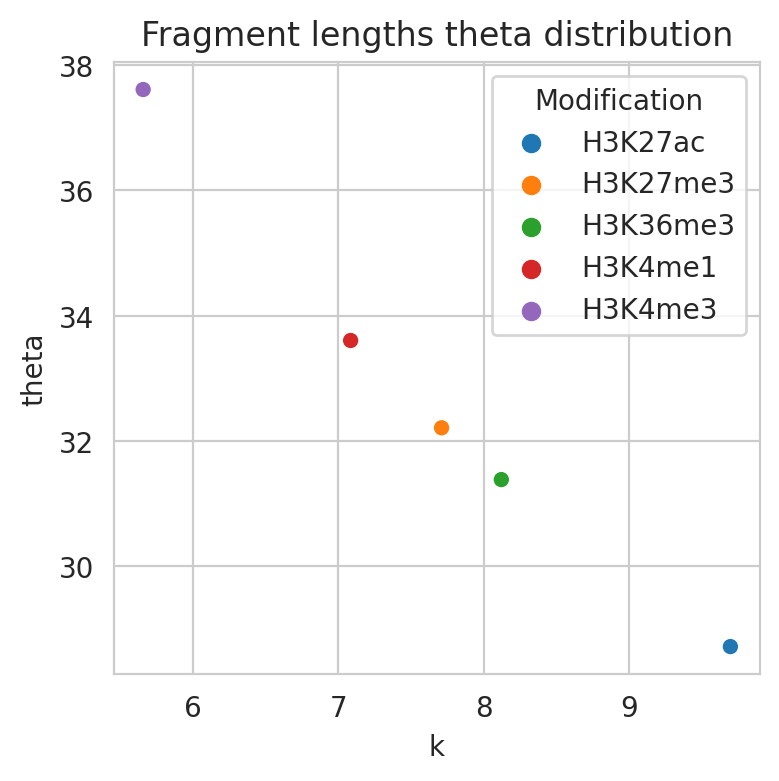

In [6]:
fig = plt.figure(figsize=(4, 4))
sns.scatterplot(data=models_df, x='k', y='theta', hue='Modification', markers=True)
plt.title(f'Fragment lengths theta distribution')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'models_fragments_theta.pdf'), bbox_inches='tight', dpi=300)
plt.show()

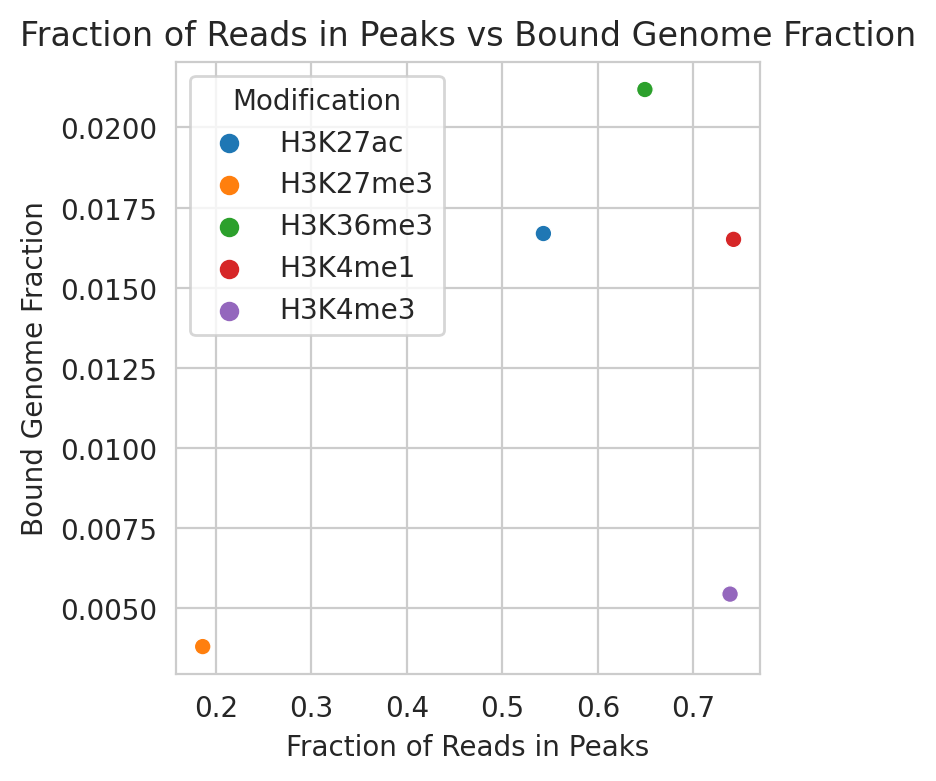

In [7]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=models_df, x='s', y='f', hue='Modification', markers=True)
plt.title(f'Fraction of Reads in Peaks vs Bound Genome Fraction')
plt.xlabel('Fraction of Reads in Peaks')
plt.ylabel('Bound Genome Fraction')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'models_frip_vs_bound_genome.pdf'), bbox_inches='tight', dpi=300)
plt.show()

# Report analysis

In [8]:
def bedl(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return tf[2] - tf[1]
    except:
        return np.zeros(0)  # Empty file


def lines(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return len(tf)
    except:
        return 0  # Empty file

def d(a, b):
    return a / b if b != 0 else 0

def last_col(file):
    try:
        cols = len(pd.read_csv(file, sep='\t', nrows=1, header=None).columns)
        return pd.read_csv(file, sep='\t', header=None, usecols=[cols - 1])[cols - 1]
    except:
        return np.zeros(0)  # Empty file

def sorted_file(file):
    ts = tempfile.mktemp()
    !cat {file} | sort -k1,1 -k2,2n > {ts}
    return ts

In [9]:
original_peaks = {
    'H3K4me3': PATH + '/peaks/H3K4me3_q0.05_peaks.narrowPeak',
    'H3K27ac': PATH + '/peaks/H3K27ac_broad0.1_peaks.broadPeak',
    'H3K4me1': PATH + '/peaks/H3K4me1_broad0.1_peaks.broadPeak',
    'H3K27me3' : PATH + '/peaks/H3K27me3-W200-G600-islands-summary-FDR0.01',
    'H3K36me3': PATH + '/peaks/H3K36me3-W200-G600-islands-summary-FDR0.01',
}

In [10]:
import glob
sampled_peaks = {}
for m in ['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed']:
    for n in range(1, N + 1):
        sampled_peaks[(m, n)] = glob.glob(PATH + f'/fastq/{m}_*_{n}.bed')[0]
sampled_peaks

{('H3K4me3', 1): '/home/jetbrains/data/2023_chips/fastq/H3K4me3_chr15_1.bed',
 ('H3K4me3', 2): '/home/jetbrains/data/2023_chips/fastq/H3K4me3_chr15_2.bed',
 ('H3K4me3', 3): '/home/jetbrains/data/2023_chips/fastq/H3K4me3_chr15_3.bed',
 ('H3K4me3', 4): '/home/jetbrains/data/2023_chips/fastq/H3K4me3_chr15_4.bed',
 ('H3K4me3', 5): '/home/jetbrains/data/2023_chips/fastq/H3K4me3_chr15_5.bed',
 ('H3K27ac', 1): '/home/jetbrains/data/2023_chips/fastq/H3K27ac_chr15_1.bed',
 ('H3K27ac', 2): '/home/jetbrains/data/2023_chips/fastq/H3K27ac_chr15_2.bed',
 ('H3K27ac', 3): '/home/jetbrains/data/2023_chips/fastq/H3K27ac_chr15_3.bed',
 ('H3K27ac', 4): '/home/jetbrains/data/2023_chips/fastq/H3K27ac_chr15_4.bed',
 ('H3K27ac', 5): '/home/jetbrains/data/2023_chips/fastq/H3K27ac_chr15_5.bed',
 ('H3K4me1', 1): '/home/jetbrains/data/2023_chips/fastq/H3K4me1_chr15_1.bed',
 ('H3K4me1', 2): '/home/jetbrains/data/2023_chips/fastq/H3K4me1_chr15_2.bed',
 ('H3K4me1', 3): '/home/jetbrains/data/2023_chips/fastq/H3K4me1_

In [11]:
from itertools import product
def load_peaks(path, suffix):
    df_fdr = pd.DataFrame(columns=['file', 'modification', 'n', 'multiplier'], dtype=object)
    for (m, n, mult) in tqdm(product(
            ['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'], 
            range(1, N + 1), 
            MULTIPLIERS)):
        res = glob.glob(f'{path}/{m}*_{n}_{mult}*{suffix}')
        if len(res) > 1:
            print(f'WARNING, more than 1 found for {path} {suffix}')
        for f in res:
            df_fdr.loc[len(df_fdr)] = (f, m, n, mult)
    return df_fdr

# Load peaks

In [12]:
df_macs2 = load_peaks(PATH + '/macs2', '.narrowPeak')
df_macs2['tool'] = 'MACS2'
print('MACS2', len(df_macs2))

df_macs2broad = load_peaks(PATH + '/macs2', '.broadPeak')
df_macs2broad['tool'] = 'MACS2 broad'
print('MACS2 broad', len(df_macs2broad))

df_sicer = load_peaks(PATH + '/sicer', 'FDR0.01')
df_sicer['tool'] = 'SICER'
print('SICER', len(df_sicer))

df_span = load_peaks(PATH + '/span', '.peak')
df_span['tool'] = 'SPAN'
print('SPAN', len(df_span))

df_homer = load_peaks(PATH + '/homer', '.peaks')
df_homer['tool'] = 'HOMER'
print('HOMER', len(df_homer))

df_hotspot = load_peaks(PATH + '/hotspot', '.peak')
df_hotspot['tool'] = 'Hotspot'
print('Hotspot', len(df_hotspot))

df_peakseq = load_peaks(PATH + '/peakseq', '.narrowPeak')
df_peakseq['tool'] = 'Peakseq'
print('Peakseq', len(df_peakseq))

df_peaks = pd.concat([df_macs2, df_macs2broad, df_span, df_sicer, df_homer, df_hotspot, df_peakseq]).reset_index(drop=True)
df_peaks['quality'] = [f'{int(m * 100)}%' for m in df_peaks['multiplier']]
df_peaks.sample(5)

0it [00:00, ?it/s]

MACS2 150


0it [00:00, ?it/s]

MACS2 broad 150


0it [00:00, ?it/s]

SICER 150


0it [00:00, ?it/s]

SPAN 150


0it [00:00, ?it/s]

HOMER 150


0it [00:00, ?it/s]

Hotspot 150


0it [00:00, ?it/s]

Peakseq 150


file modification  n  \
780  /home/jetbrains/data/2023_chips/hotspot/H3K27a...      H3K27ac  2   
877  /home/jetbrains/data/2023_chips/hotspot/mixed_...        mixed  1   
317  /home/jetbrains/data/2023_chips/span/H3K4me3_c...      H3K4me3  4   
598  /home/jetbrains/data/2023_chips/sicer/mixed_k4...        mixed  5   
484  /home/jetbrains/data/2023_chips/sicer/H3K27ac_...      H3K27ac  2   

     multiplier     tool quality  
780         1.0  Hotspot    100%  
877         0.5  Hotspot     50%  
317         0.5     SPAN     50%  
598         0.2    SICER     20%  
484         0.1    SICER     10%

# Estimate overlap with ground truth peaks

In [13]:
tf = tempfile.mktemp()
t = []
for _, (file, m, n) in tqdm(df_peaks[['file', 'modification', 'n']].iterrows()):
    true_peaks_file = sampled_peaks[(m, n)]
    true_peaks = lines(true_peaks_file)
    true_length = bedl(true_peaks_file).sum()
    peaks = lines(file)
    length = bedl(file).sum()
    true_peaks_file_s = sorted_file(true_peaks_file)
    file_s = sorted_file(file)
    !bedtools intersect -a {true_peaks_file_s} -b {file_s} -wa -u > {tf}
    true_overlap = lines(tf)
    !bedtools intersect -b {true_peaks_file_s} -a {file_s} -wa -u > {tf}
    overlap = lines(tf)
    !bedtools intersect -a {true_peaks_file_s} -b {file_s} -wo > {tf}
    overlap_len = int(last_col(tf).sum())
    t.append((true_peaks_file, true_peaks, true_length, peaks, length, true_overlap, overlap, overlap_len))
    
t = pd.DataFrame(t, columns=['true_peaks_file', 'true_peaks', 'true_length',
                             'peaks', 'length', 
                             'true_overlap', 'overlap', 'overlap_len'])
for c in t.columns:
    df_peaks[c] = list(t[c])
del t

df_peaks['Precision'] = df_peaks['overlap'] / df_peaks['peaks']
df_peaks['Recall'] = df_peaks['true_overlap'] / df_peaks['true_peaks']
df_peaks['F1'] = [2 / (1 / p + 1 / r) if min(p, r) > 0 else 0 for p, r in zip(df_peaks['Precision'], df_peaks['Recall'])]
df_peaks['Jaccard'] = df_peaks['overlap_len'] / (df_peaks['true_length'] + df_peaks['length'] - df_peaks['overlap_len'])


df_peaks.sample(5)

0it [00:00, ?it/s]

Error: unable to open file or unable to determine types for file /tmp/tmp3nof97mp

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).
Error: unable to open file or unable to determine types for file /tmp/tmp3nof97mp

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).
Error: unable to open file or unable to determine types for file /tmp/tmp3nof97mp

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).
Error: unable to open file or unable to determine types for file /tmp/tmpa_1cfffd

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file 

file modification  n  \
743  /home/jetbrains/data/2023_chips/homer/mixed_k4...        mixed  4   
82   /home/jetbrains/data/2023_chips/macs2/H3K27me3...     H3K27me3  2   
120  /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  5   
943  /home/jetbrains/data/2023_chips/peakseq/H3K27a...      H3K27ac  4   
638  /home/jetbrains/data/2023_chips/homer/H3K27ac_...      H3K27ac  3   

     multiplier     tool quality  \
743         0.2    HOMER     20%   
82          0.5    MACS2     50%   
120         1.0    MACS2    100%   
943         0.2  Peakseq     20%   
638         0.2    HOMER     20%   

                                       true_peaks_file  true_peaks  \
743  /home/jetbrains/data/2023_chips/fastq/mixed_k4...         500   
82   /home/jetbrains/data/2023_chips/fastq/H3K27me3...         500   
120  /home/jetbrains/data/2023_chips/fastq/H3K36me3...         500   
943  /home/jetbrains/data/2023_chips/fastq/H3K27ac_...         500   
638  /home/jetbrains/data/2023_chips/fastq/H3K27ac_...         500   

     true_length  peaks     length  true_overlap  overlap  overlap_len  \
743      2495871   1380  2505571.0           197      376      1922677   
82       2840500    792  2308633.0           393      765      2277275   
120      6404900   1017  5334933.0           369     1015      5317177   
943       569273    266   239759.0             0        0            0   
638       558068   1060   850042.0           257      265       384038   

     Precision  Recall        F1   Jaccard  
743   0.272464   0.394  0.322150  0.624496  
82    0.965909   0.786  0.866717  0.792962  
120   0.998033   0.738  0.848542  0.827878  
943   0.000000   0.000  0.000000  0.000000  
638   0.250000   0.514  0.336387  0.375011

# Peaks number and lengths

In [14]:
TOOLS = ['MACS2', 'MACS2 broad', 'SICER', 'HOMER', 'Hotspot', 'Peakseq', 'SPAN']
palette = plt.get_cmap('tab10')
TOOLS_PALETTE = {t: palette(i) for i, t in enumerate(TOOLS)}

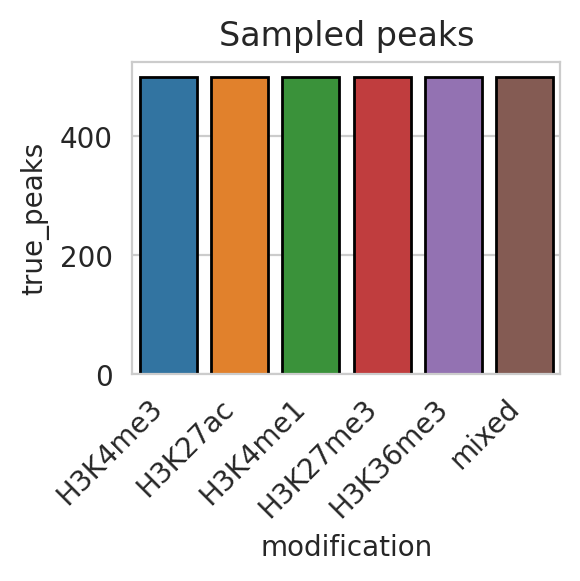

In [15]:
fig = plt.figure(figsize=(3, 3))
sns.barplot(data=df_peaks, x="modification", y="true_peaks",
            # capsize=.1, err_kws={'linewidth': 2},
            edgecolor="black",
            order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'])
plt.xticks(rotation=45, ha='right')
plt.title('Sampled peaks')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'true_peaks_number.pdf'), bbox_inches='tight', dpi=300)
plt.show()

In [16]:
ts = []
for m, file in original_peaks.items():
    lengths = bedl(file)
    t = pd.DataFrame(dict(length=lengths))
    t = t.sample(min(len(t), 20_000))
    t['modification'] = m
    ts.append(t)
t_original = pd.concat(ts).reset_index(drop=True)
del ts
t_original

length modification
0         270      H3K4me3
1         494      H3K4me3
2         473      H3K4me3
3         548      H3K4me3
4        4815      H3K4me3
...       ...          ...
99995   77199     H3K36me3
99996    4999     H3K36me3
99997    8199     H3K36me3
99998   48999     H3K36me3
99999    3199     H3K36me3

[100000 rows x 2 columns]

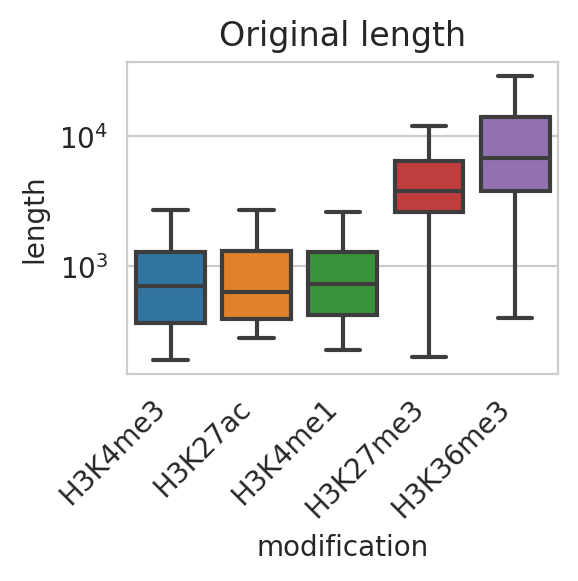

In [17]:
fig = plt.figure(figsize=(3, 3))
ax = plt.axes()
sns.boxplot(data=t_original, x="modification", y="length", showfliers=False,
            order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3'],
            ax=ax)
ax.set(yscale='log')
plt.xticks(rotation=45, ha='right')
plt.title('Original length')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'true_peaks_lengths.pdf'), bbox_inches='tight', dpi=300)
plt.show()

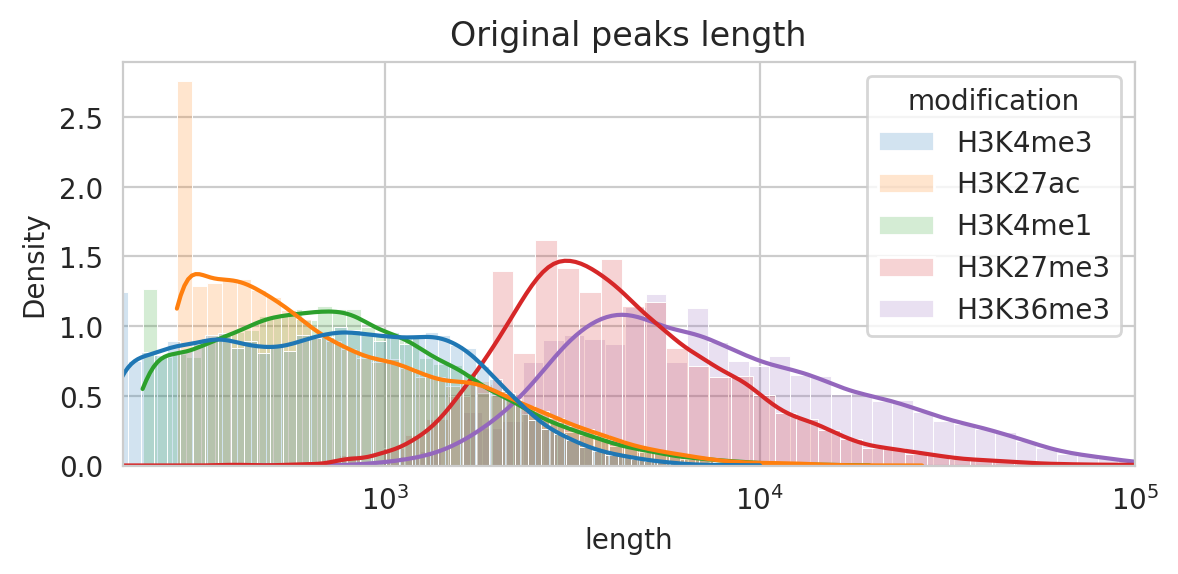

In [18]:
plt.figure(figsize=(6, 3))
ax = plt.axes()
g_results = sns.histplot(data=t_original, x='length', hue='modification', ax=ax,
                         stat='density', common_bins=False, common_norm=False,
                         bins=50, kde=True, log_scale=True, alpha=0.2,
                         hue_order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3'])
g_results.set(xscale='log')
g_results.set_xlim(200, 1e5)
ax.title.set_text('Original peaks length')
plt.savefig(os.path.join(FIGURES_DIR, f'true_peaks_lengths2.pdf'), bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [19]:
ts = []
for _, (m, file) in df_peaks[['modification', 'true_peaks_file']].iterrows():
    lengths = bedl(file)
    t = pd.DataFrame(dict(length=lengths))
    t = t.sample(min(len(t), 20_000))
    t['modification'] = m
    ts.append(t)
t_true_peaks = pd.concat(ts).reset_index(drop=True)
del ts
t_true_peaks

length modification
0         2270      H3K4me3
1          901      H3K4me3
2          291      H3K4me3
3         2300      H3K4me3
4         1619      H3K4me3
...        ...          ...
524995     441        mixed
524996     226        mixed
524997     191        mixed
524998     290        mixed
524999     191        mixed

[525000 rows x 2 columns]

/tmp/ipykernel_1088759/951696089.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '1e3', '1e4', '1e5', ''])


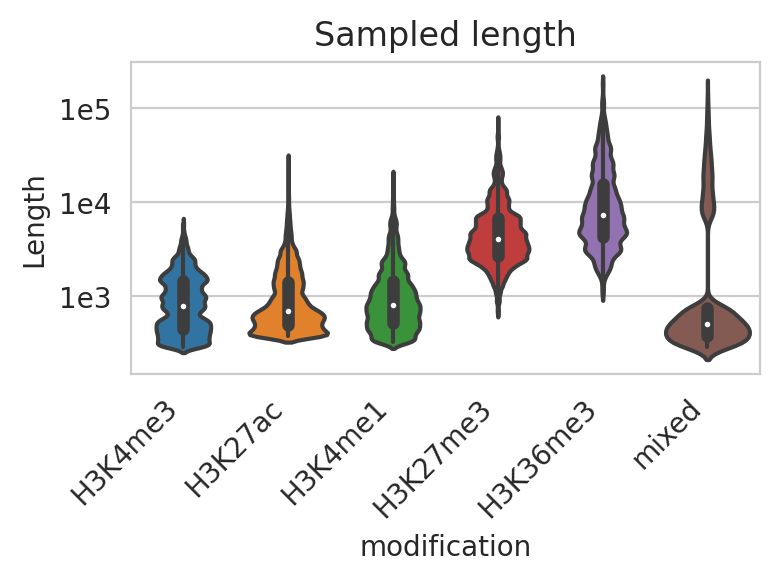

In [20]:
fig = plt.figure(figsize=(4, 3))
ax = plt.axes()
t_true_peaks['log_length'] = np.log10(t_true_peaks['length'] + 100)
sns.violinplot(data=t_true_peaks, x="modification", y="log_length",
               order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
               ax=ax)
plt.xticks(rotation=45, ha='right')
ax.set_yticklabels(['', '1e3', '1e4', '1e5', ''])
plt.ylabel('Length')
plt.title('Sampled length')
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'sampled_peaks_lengths.pdf'), bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_1088759/3808701143.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '1e3', '1e4', '1e5', ''])


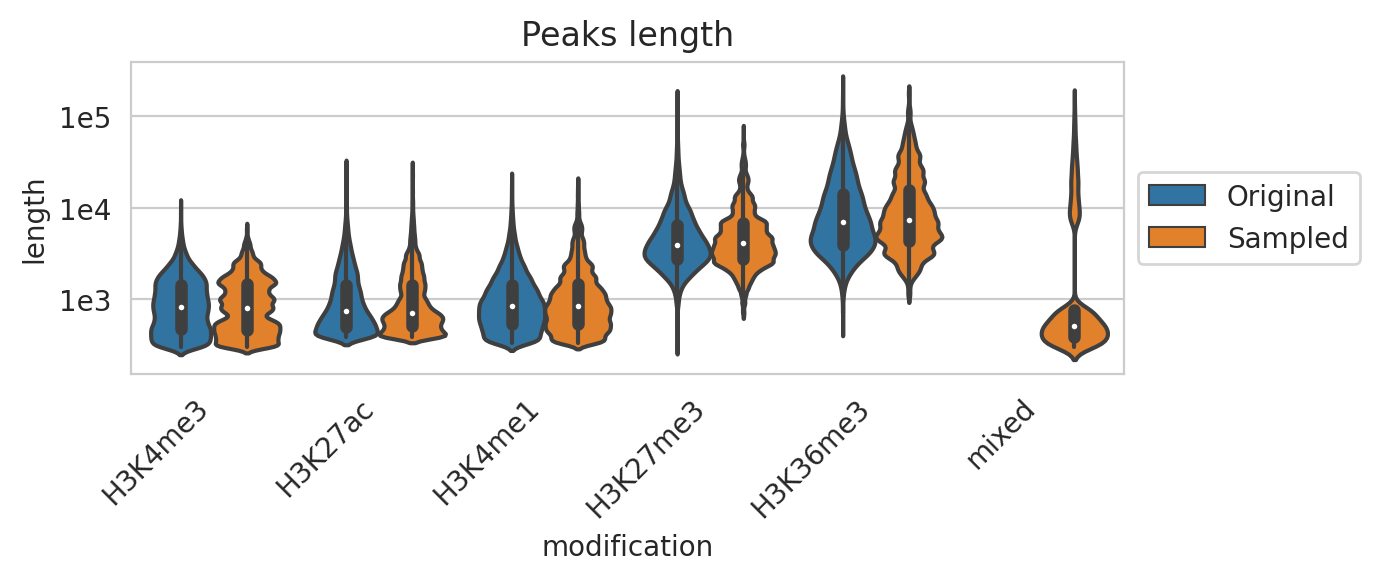

In [21]:
t_original['type'] = 'Original'
t_true_peaks['type'] = 'Sampled'
t = pd.concat([t_original, t_true_peaks]).reset_index(drop=True)
t['log_length'] = np.log10(t['length'] + 100)
plt.figure(figsize=(7, 3))
ax = plt.axes()
sns.violinplot(data=t,
               x="modification", y="log_length",
               # showfliers=False,
               hue='type', hue_order=['Original', 'Sampled'],
               order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
               ax=ax)
# Put a legend to the right of the current axix
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
# ax.set(yscale='log')
ax.set_yticklabels(['', '1e3', '1e4', '1e5', ''])
plt.ylabel('length')
plt.title('Peaks length')
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'sampled_peaks_lengths.pdf'), bbox_inches='tight', dpi=300)
plt.show()

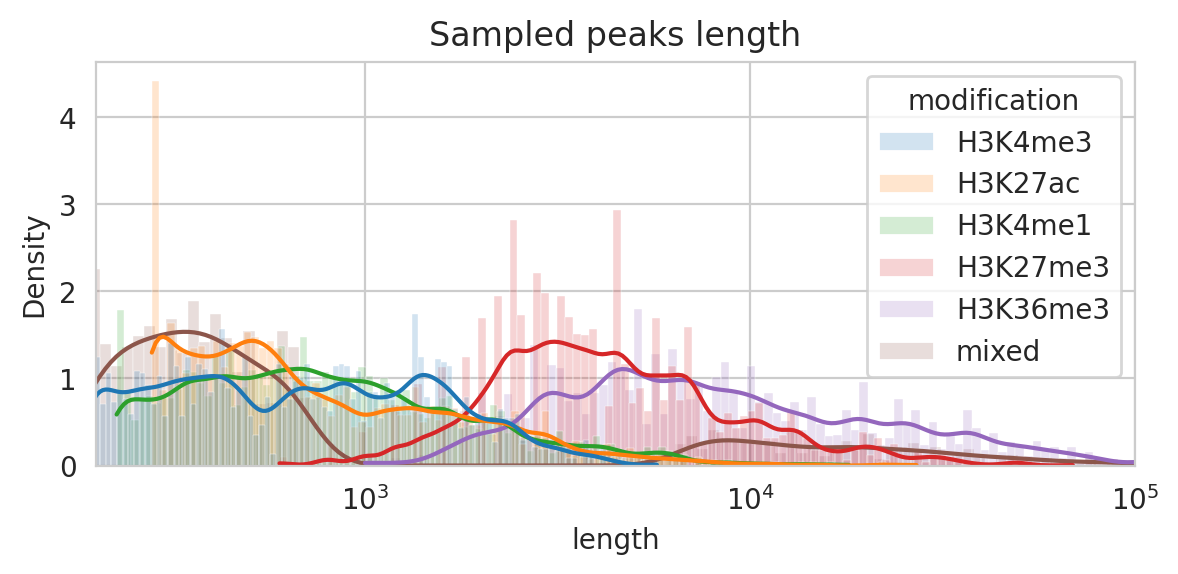

In [22]:
plt.figure(figsize=(6, 3))
ax = plt.axes()
sns.histplot(data=t_true_peaks, x='length', hue='modification',
             stat='density', common_bins=False, common_norm=False,
             bins=100, kde=True, log_scale=True, alpha=0.2,
             hue_order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
             ax=ax)
ax.set(xscale='log')
ax.set_xlim(200, 1e5)
ax.title.set_text('Sampled peaks length')
# Put a legend to the right of the current axix
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(os.path.join(FIGURES_DIR, f'sampled_peaks_lengths2.pdf'), bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

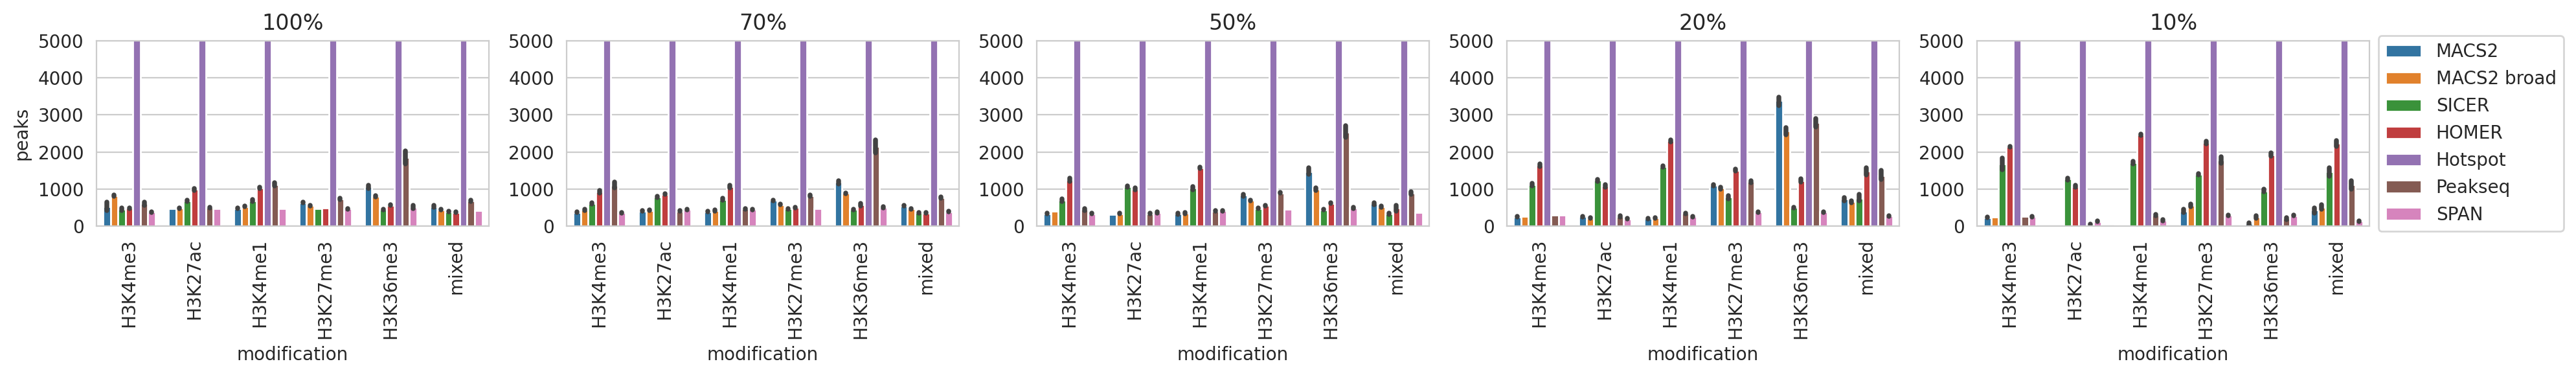

In [51]:
plt.figure(figsize=(20, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, q in enumerate(df_peaks['quality'].unique()):
    ax = axs[i]
    sns.barplot(data=df_peaks[df_peaks['quality'] == q], x="modification", y="peaks", hue='tool', ax=ax,
                order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
                hue_order=TOOLS)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_title(f'{q}')
    # Put a legend to the right of the current axis
    if i == len(axs) - 1:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
    if i > 0:
        ax.set_ylabel(None)
    ax.set_ylim(0, 5_000)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'peaks.pdf'), bbox_inches='tight', dpi=300)
plt.show()

In [25]:
df_peaks[(df_peaks['quality'] == '100%') & (df_peaks['modification'] == 'H3K36me3')]

file modification  n  \
100   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  1   
105   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  2   
110   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  3   
115   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  4   
120   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  5   
250   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  1   
255   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  2   
260   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  3   
265   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  4   
270   /home/jetbrains/data/2023_chips/macs2/H3K36me3...     H3K36me3  5   
400   /home/jetbrains/data/2023_chips/span/H3K36me3_...     H3K36me3  1   
405   /home/jetbrains/data/2023_chips/span/H3K36me3_...     H3K36me3  2   
410   /home/jetbrains/data/2023_chips/span/H3K36me3_...     H3K36me3  3   
415   /home/jetbrains/data/2023_chips/span/H3K36me3_...     H3K36me3  4   
420   /home/jetbrains/data/2023_chips/span/H3K36me3_...     H3K36me3  5   
550   /home/jetbrains/data/2023_chips/sicer/H3K36me3...     H3K36me3  1   
555   /home/jetbrains/data/2023_chips/sicer/H3K36me3...     H3K36me3  2   
560   /home/jetbrains/data/2023_chips/sicer/H3K36me3...     H3K36me3  3   
565   /home/jetbrains/data/2023_chips/sicer/H3K36me3...     H3K36me3  4   
570   /home/jetbrains/data/2023_chips/sicer/H3K36me3...     H3K36me3  5   
700   /home/jetbrains/data/2023_chips/homer/H3K36me3...     H3K36me3  1   
705   /home/jetbrains/data/2023_chips/homer/H3K36me3...     H3K36me3  2   
710   /home/jetbrains/data/2023_chips/homer/H3K36me3...     H3K36me3  3   
715   /home/jetbrains/data/2023_chips/homer/H3K36me3...     H3K36me3  4   
720   /home/jetbrains/data/2023_chips/homer/H3K36me3...     H3K36me3  5   
850   /home/jetbrains/data/2023_chips/hotspot/H3K36m...     H3K36me3  1   
855   /home/jetbrains/data/2023_chips/hotspot/H3K36m...     H3K36me3  2   
860   /home/jetbrains/data/2023_chips/hotspot/H3K36m...     H3K36me3  3   
865   /home/jetbrains/data/2023_chips/hotspot/H3K36m...     H3K36me3  4   
870   /home/jetbrains/data/2023_chips/hotspot/H3K36m...     H3K36me3  5   
1000  /home/jetbrains/data/2023_chips/peakseq/H3K36m...     H3K36me3  1   
1005  /home/jetbrains/data/2023_chips/peakseq/H3K36m...     H3K36me3  2   
1010  /home/jetbrains/data/2023_chips/peakseq/H3K36m...     H3K36me3  3   
1015  /home/jetbrains/data/2023_chips/peakseq/H3K36m...     H3K36me3  4   
1020  /home/jetbrains/data/2023_chips/peakseq/H3K36m...     H3K36me3  5   

      multiplier         tool quality  \
100          1.0        MACS2    100%   
105          1.0        MACS2    100%   
110          1.0        MACS2    100%   
115          1.0        MACS2    100%   
120          1.0        MACS2    100%   
250          1.0  MACS2 broad    100%   
255          1.0  MACS2 broad    100%   
260          1.0  MACS2 broad    100%   
265          1.0  MACS2 broad    100%   
270          1.0  MACS2 broad    100%   
400          1.0         SPAN    100%   
405          1.0         SPAN    100%   
410          1.0         SPAN    100%   
415          1.0         SPAN    100%   
420          1.0         SPAN    100%   
550          1.0        SICER    100%   
555          1.0        SICER    100%   
560          1.0        SICER    100%   
565          1.0        SICER    100%   
570          1.0        SICER    100%   
700          1.0        HOMER    100%   
705          1.0        HOMER    100%   
710          1.0        HOMER    100%   
715          1.0        HOMER    100%   
720          1.0        HOMER    100%   
850          1.0      Hotspot    100%   
855          1.0      Hotspot    100%   
860          1.0      Hotspot    100%   
865          1.0      Hotspot    100%   
870          1.0      Hotspot    100%   
1000         1.0      Peakseq    100%   
1005         1.0      Peakseq    100% 

In [26]:
ts = []
for _, (m, q, tool, file) in df_peaks[['modification', 'quality', 'tool', 'file']].iterrows():
    lengths = bedl(file)
    t = pd.DataFrame(dict(length=lengths))
    t = t.sample(min(len(t), 20_000))
    t['modification'] = m
    t['quality'] = q
    t['tool'] = tool
    ts.append(t)
t = pd.concat(ts).reset_index(drop=True)
del ts
t

length modification quality     tool
0         193.0      H3K4me3    100%    MACS2
1         193.0      H3K4me3    100%    MACS2
2         193.0      H3K4me3    100%    MACS2
3         193.0      H3K4me3    100%    MACS2
4         193.0      H3K4me3    100%    MACS2
...         ...          ...     ...      ...
3668100   440.0        mixed     10%  Peakseq
3668101   457.0        mixed     10%  Peakseq
3668102    45.0        mixed     10%  Peakseq
3668103   187.0        mixed     10%  Peakseq
3668104    66.0        mixed     10%  Peakseq

[3668105 rows x 4 columns]

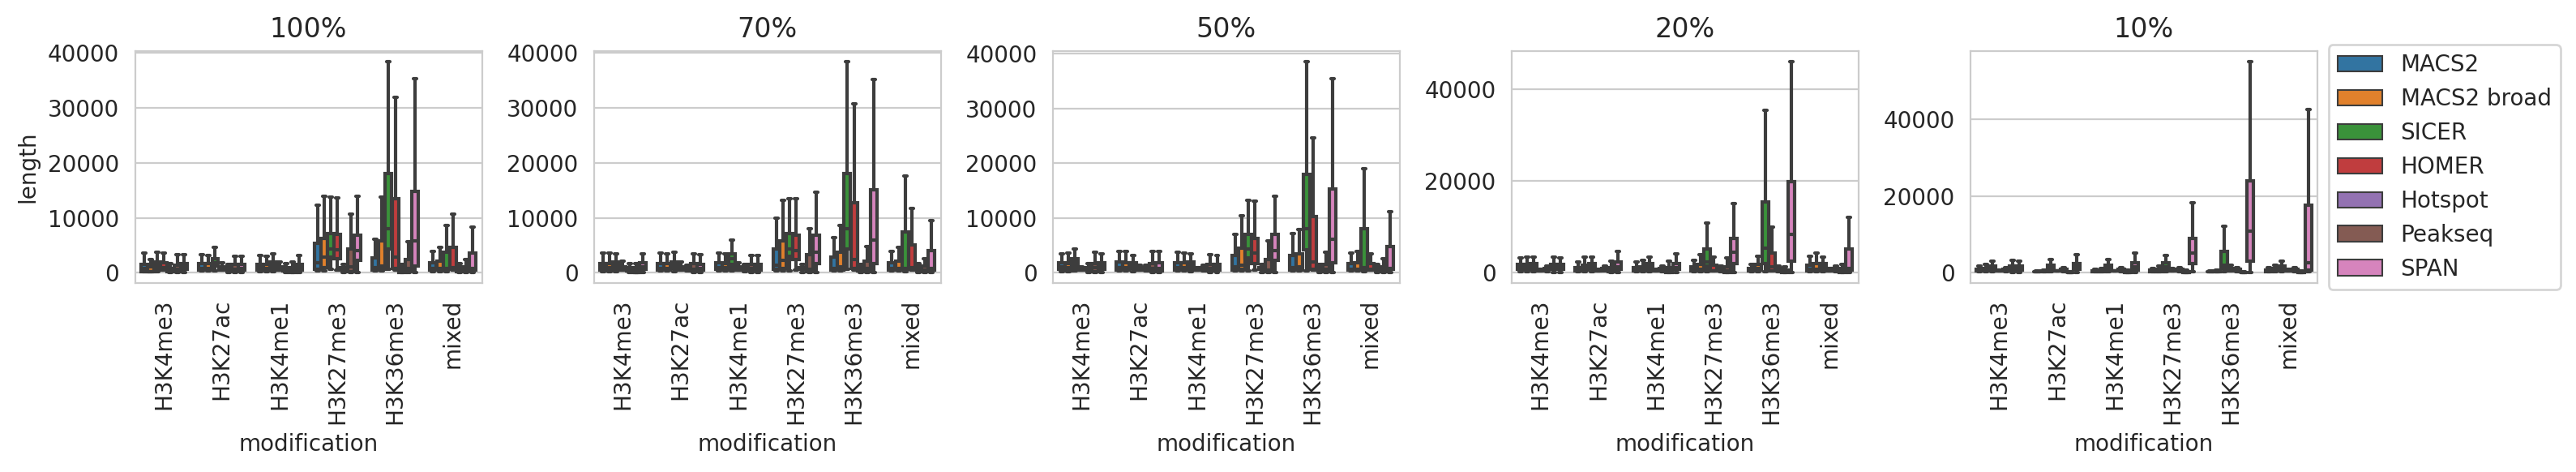

In [27]:
plt.figure(figsize=(16, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, q in enumerate(df_peaks['quality'].unique()):
    ax = axs[i]
    sns.boxplot(data=t[t['quality']==q], x="modification", y="length", hue='tool', showfliers=False, ax=ax,
                order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
                hue_order=TOOLS)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_title(f'{q}')
    # Put a legend to the right of the current axis
    if i == len(axs) - 1:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
    if i > 0:
        ax.set_ylabel(None)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'lengths.pdf'), bbox_inches='tight', dpi=300)
plt.show()

# Jaccard, precision, recall, F1

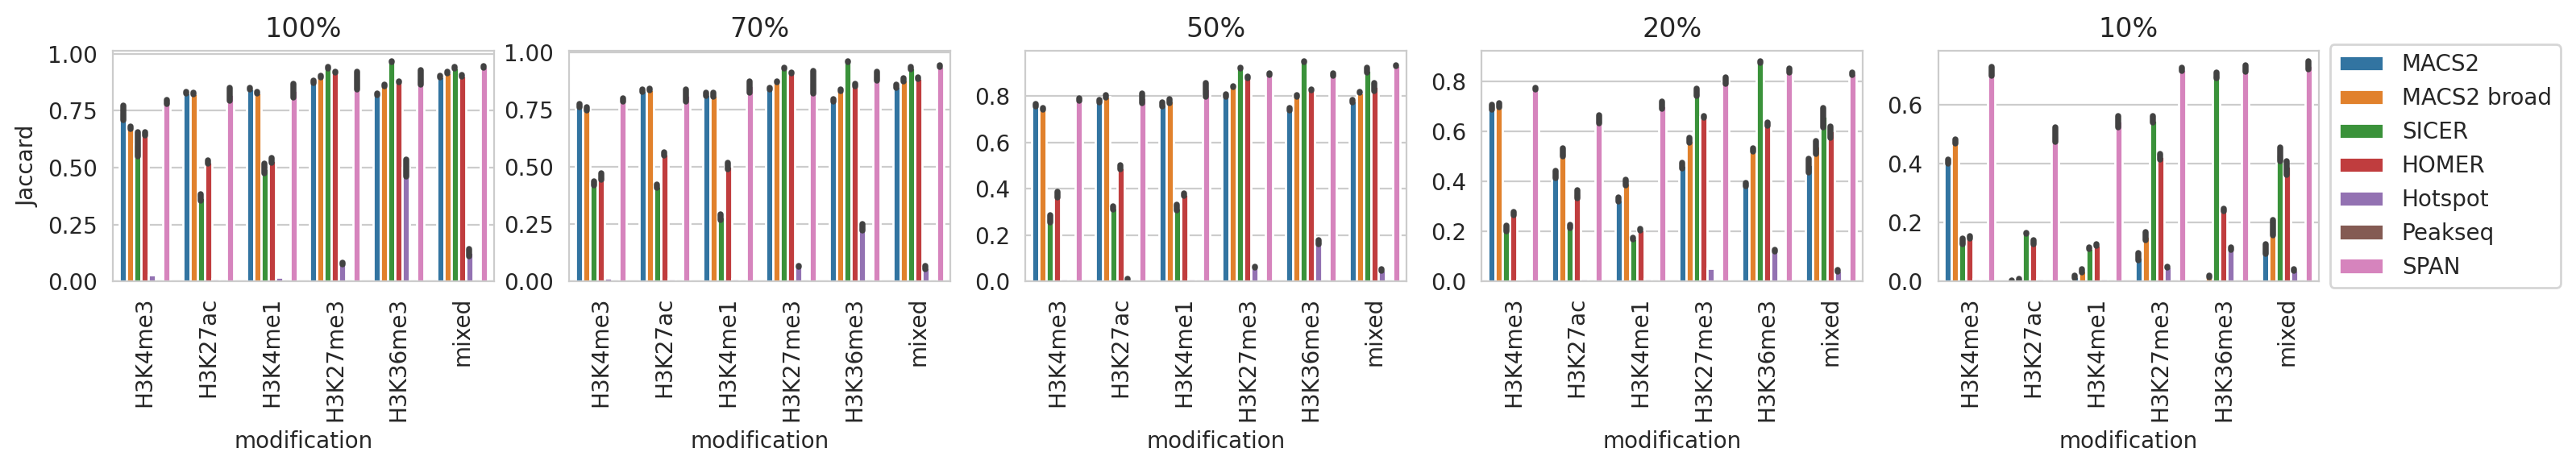

In [28]:
plt.figure(figsize=(16, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, q in enumerate(df_peaks['quality'].unique()):
    ax = axs[i]
    sns.barplot(data=df_peaks[df_peaks['quality'] == q], x="modification", y="Jaccard", hue='tool', ax=ax,
                order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
                hue_order=TOOLS)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_title(f'{q}')
    # Put a legend to the right of the current axis
    if i == len(axs) - 1:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
    if i > 0:
        ax.set_ylabel(None)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'jaccard.pdf'), bbox_inches='tight', dpi=300)
plt.show()

In [29]:
df_peaks0 = df_peaks.copy()
# Add 0.0 multiplier
for m, tool in product(['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'], TOOLS):
    row = [None, m, None, 0.0, tool, '0%'] + [None] * (len(df_peaks.columns) - 7) + [0.0]
    df_peaks0.loc[len(df_peaks0)] = row
df_peaks0

file modification     n  \
0     /home/jetbrains/data/2023_chips/macs2/H3K4me3_...      H3K4me3     1   
1     /home/jetbrains/data/2023_chips/macs2/H3K4me3_...      H3K4me3     1   
2     /home/jetbrains/data/2023_chips/macs2/H3K4me3_...      H3K4me3     1   
3     /home/jetbrains/data/2023_chips/macs2/H3K4me3_...      H3K4me3     1   
4     /home/jetbrains/data/2023_chips/macs2/H3K4me3_...      H3K4me3     1   
...                                                 ...          ...   ...   
1087                                               None        mixed  None   
1088                                               None        mixed  None   
1089                                               None        mixed  None   
1090                                               None        mixed  None   
1091                                               None        mixed  None   

      multiplier     tool quality  \
0            1.0    MACS2    100%   
1            0.7    MACS2     70%   
2            0.5    MACS2     50%   
3            0.2    MACS2     20%   
4            0.1    MACS2     10%   
...          ...      ...     ...   
1087         0.0    SICER      0%   
1088         0.0    HOMER      0%   
1089         0.0  Hotspot      0%   
1090         0.0  Peakseq      0%   
1091         0.0     SPAN      0%   

                                        true_peaks_file true_peaks  \
0     /home/jetbrains/data/2023_chips/fastq/H3K4me3_...        500   
1     /home/jetbrains/data/2023_chips/fastq/H3K4me3_...        500   
2     /home/jetbrains/data/2023_chips/fastq/H3K4me3_...        500   
3     /home/jetbrains/data/2023_chips/fastq/H3K4me3_...        500   
4     /home/jetbrains/data/2023_chips/fastq/H3K4me3_...        500   
...                                                 ...        ...   
1087                                               None       None   
1088                                               None       None   
1089                                               None       None   
1090                                               None       None   
1091                                               None       None   

     true_length peaks    length true_overlap overlap overlap_len Precision  \
0         446051   724  553939.0          398     401      408267  0.553867   
1         446051   394  463046.0          359     367      393356  0.931472   
2         446051   345  432379.0          329     335      378729  0.971014   
3         446051   258  358434.0          253     256      327744  0.992248   
4         446051   238  195186.0          184     235      187942  0.987395   
...          ...   ...       ...          ...     ...         ...       ...   
1087        None  None      None         None    None        None      None   
1088        None  None      None         None    None        None      None   
1089        None  None      None         None    None        None      None   
1090        None  None      None         None    None        None      None   
1091        None  None      None         None    None        None      None   

     Recall        F1   Jaccard  
0     0.796  0.653217  0.689963  
1     0.718  0.810922  0.762701  
2     0.658  0.784434  0.757911  
3     0.506  0.670219  0.687468  
4     0.368   0.53617  0.414613  
...     ...       ...       ...  
1087   None      None  0.000000  
1088   None      None  0.000000  
1089   None      None  0.000000  
1090   None      None  0.000000  
1091   None      None  0.000000  

[1092 rows x 18 columns]

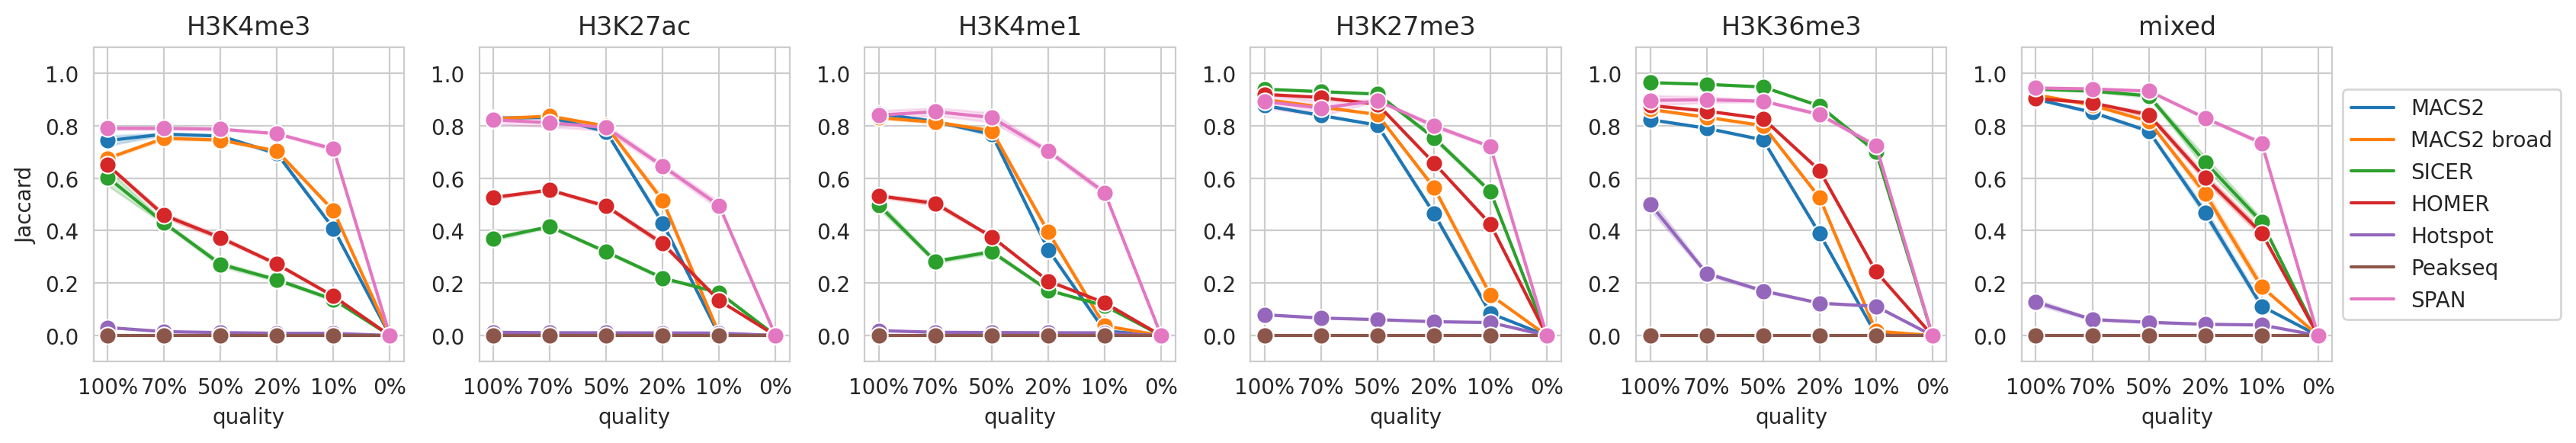

In [30]:
plt.figure(figsize=(17, 3))
axs = [plt.subplot(1, 6, i + 1) for i in range(6)]
for i, m in enumerate(['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed']):
    ax = axs[i]
    sns.lineplot(data=df_peaks0[(df_peaks0['modification'] == m) &
                                (df_peaks0['tool'] != 'SPAN')], x="quality", y="Jaccard", hue='tool', ax=ax,
                 hue_order=TOOLS,
                 palette=TOOLS_PALETTE,
                 errorbar='se',
                 marker='o', markersize=8)
    sns.lineplot(data=df_peaks0[(df_peaks0['modification'] == m) &
                                (df_peaks0['tool'] == 'SPAN')], x="quality", y="Jaccard", hue='tool', ax=ax,
                 hue_order=TOOLS,
                 palette=TOOLS_PALETTE,
                 errorbar='se',
                 marker='o', markersize=8,
                 legend=False)
    ax.set_title(f'{m}')
    ax.set_ylim([-0.1, 1.1])
    # Put a legend to the right of the current axis
    if i == 5:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
    if i > 0:
        ax.set_ylabel(None)
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'jaccard2.pdf'), bbox_inches='tight', dpi=300)
plt.show()

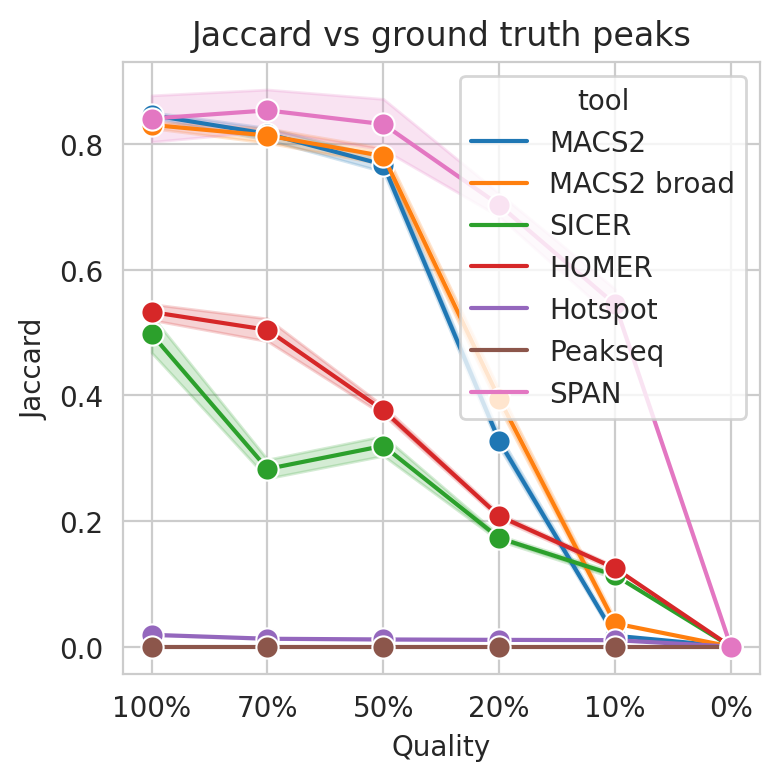

In [31]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=df_peaks0[df_peaks0['modification'] == 'H3K4me1'], x="quality", y="Jaccard", hue='tool',
             hue_order=TOOLS,
             palette=TOOLS_PALETTE,
             errorbar='sd', marker='o', markersize=8)
plt.title('Jaccard vs ground truth peaks')
plt.xlabel('Quality')
plt.ylabel('Jaccard')
plt.tight_layout()
plt.show()

/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

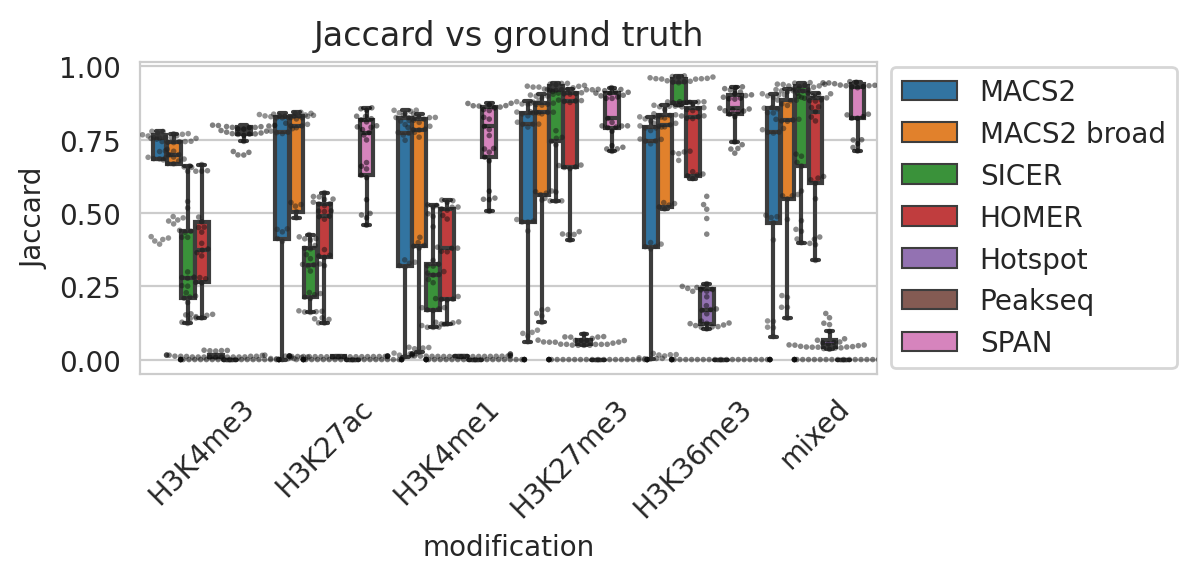

In [32]:
plt.figure(figsize=(6, 3))
ax = plt.axes()
sns.boxplot(data=df_peaks[df_peaks['multiplier'] > 0],
            x='modification', y='Jaccard', hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            showfliers=False,
            ax=ax)
sns.swarmplot(data=df_peaks[df_peaks['multiplier'] > 0],
              x='modification', y='Jaccard', hue='tool',
              dodge=True, size=2, color="black", alpha=0.5, palette='dark:black',
              hue_order=TOOLS,
              legend=False,
              ax=ax)
ax.set_title('Jaccard vs ground truth')
ax.xaxis.set_tick_params(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'jaccard3.pdf'), bbox_inches='tight', dpi=300)
plt.show()

# Jaccard AUC vs quality

In [33]:
t = []
for (m, n, tool), dft in tqdm(list(df_peaks0[df_peaks0['quality'] != '0%'].groupby(['modification', 'n', 'tool']))):
    aj = 0
    mprev = 0
    jprev = 0
    for _, row in dft.sort_values(by=['multiplier']).iterrows():
        aj += (row['multiplier'] - mprev) * (row['Jaccard'] + jprev) / 2
        mprev, jprev = row['multiplier'], row['Jaccard']
    t.append((m, n, tool, aj))
dfjaccardauc = pd.DataFrame(data=t, columns=['modification', 'n', 'tool', 'AUC'])
dfjaccardauc.sample(3)

  0%|          | 0/210 [00:00<?, ?it/s]

modification  n     tool       AUC
86      H3K36me3  3    MACS2  0.589501
155      H3K4me3  3  Hotspot  0.013585
109      H3K4me1  1  Peakseq  0.000000

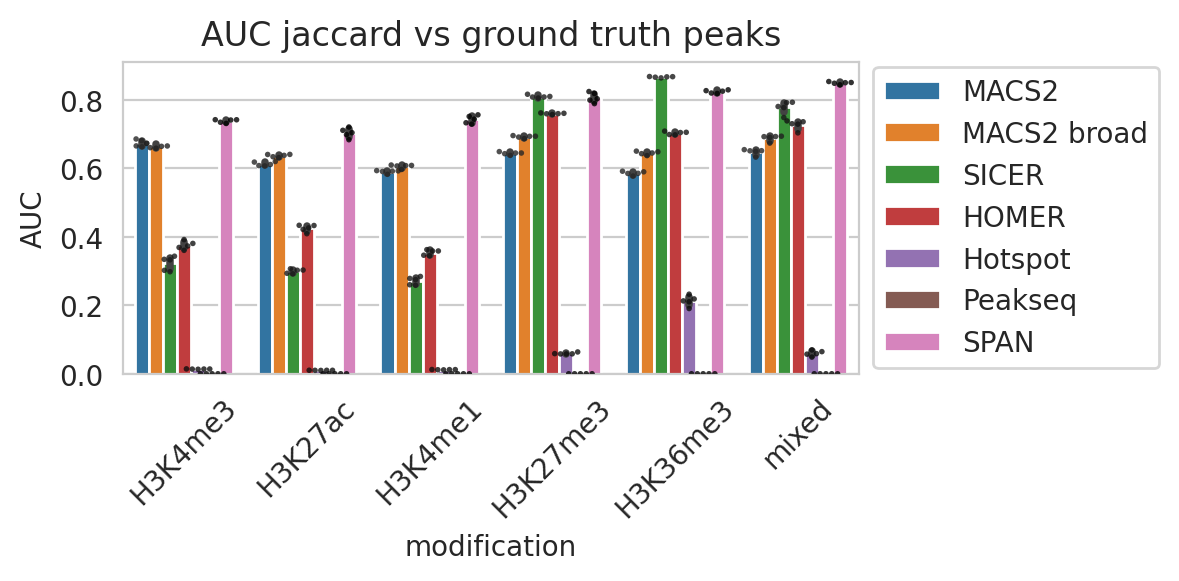

In [35]:
plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.title.set_text('AUC jaccard vs ground truth peaks')
sns.barplot(data=dfjaccardauc, x='modification', y='AUC',hue='tool',
            # capsize=.05, err_kws={'linewidth': 2},
            palette=TOOLS_PALETTE,
            order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
            hue_order=TOOLS,
            ax=ax)
sns.swarmplot(data=dfjaccardauc, x='modification', y='AUC',hue='tool',
              dodge=True, size=2, color="black", alpha=0.8, palette='dark:black',
              order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
              hue_order=TOOLS, legend=False,
              ax=ax)
ax.xaxis.set_tick_params(rotation=45)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'jaccard_auc2.pdf'), bbox_inches='tight', dpi=300)
plt.show()

Precision


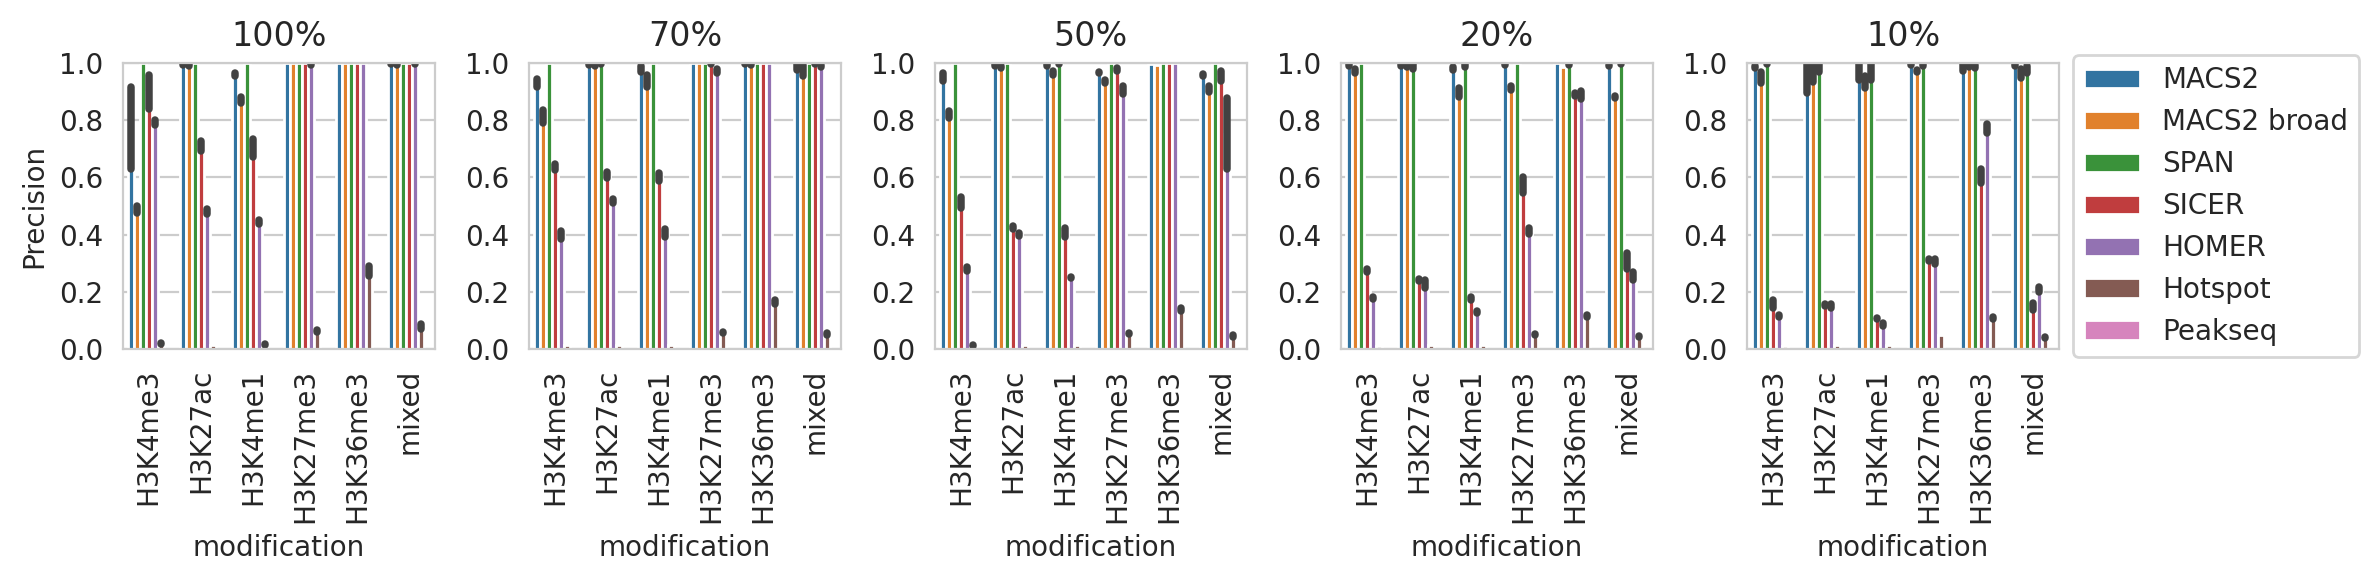

Recall


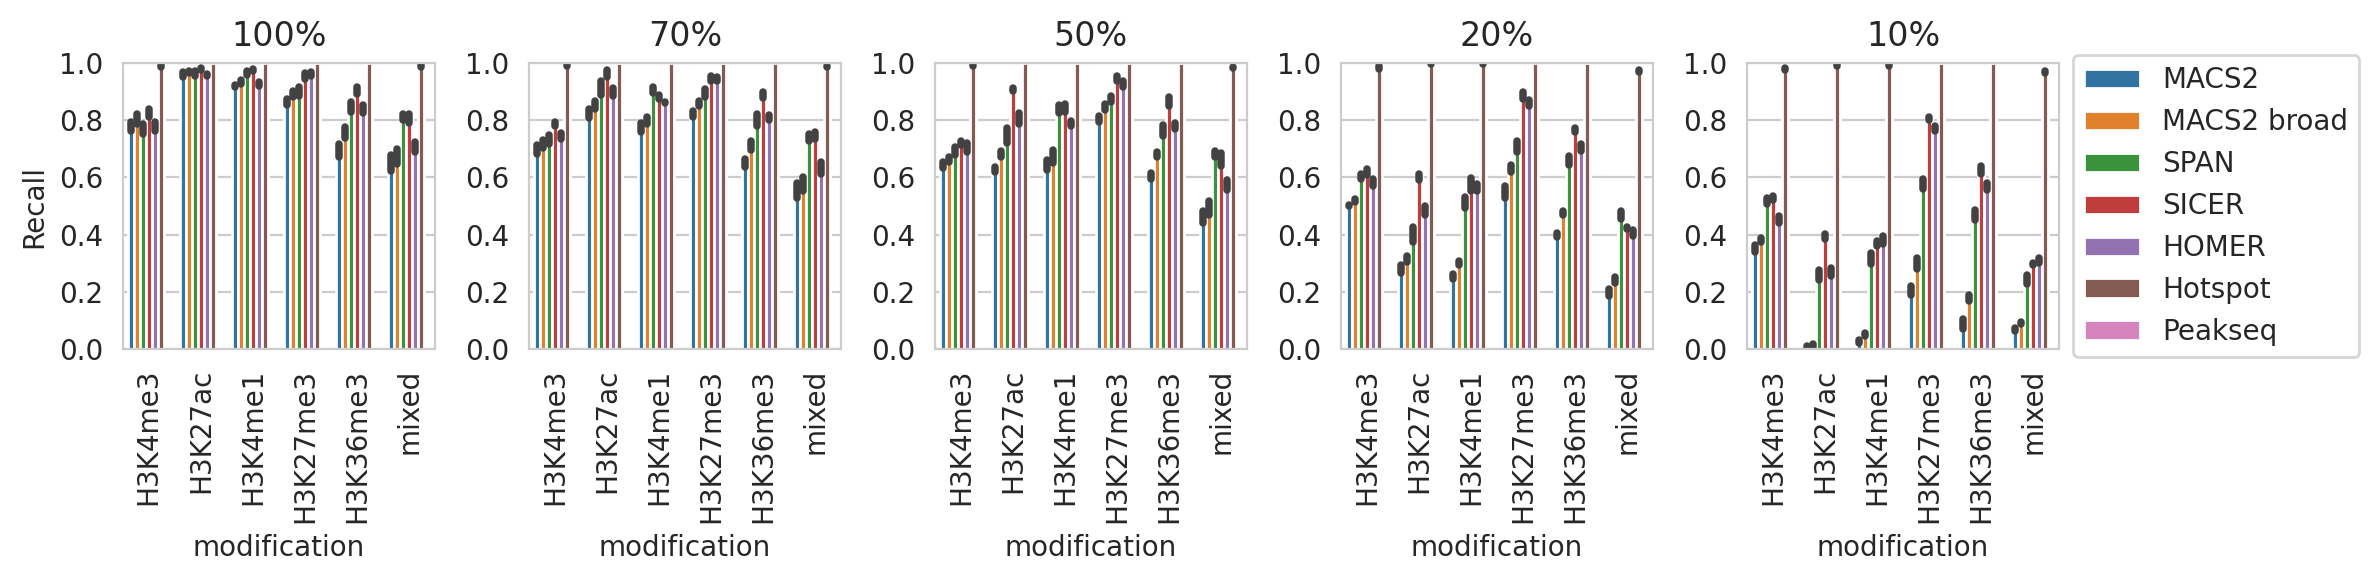

F1


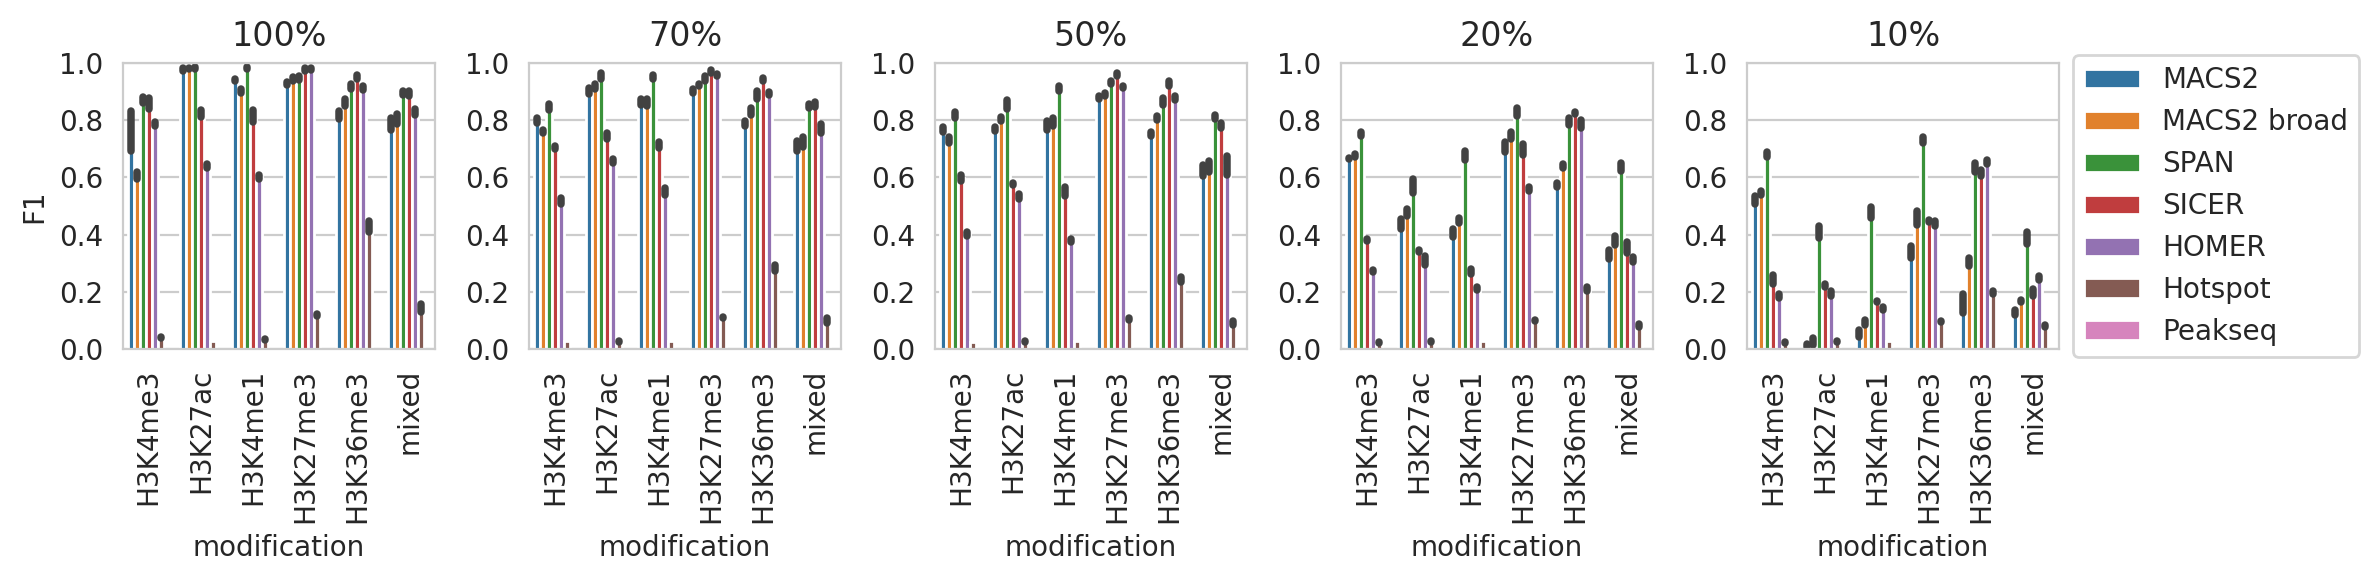

In [36]:
for y in ['Precision', 'Recall', 'F1']:
    print(y)
    plt.figure(figsize=(12, 3))
    axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
    for i, q in enumerate(df_peaks['quality'].unique()):
        if q == '0%':
            continue
        ax = axs[i]
        sns.barplot(data=df_peaks[(df_peaks['quality'] == q)], x="modification", y=y, hue='tool', ax=ax,
                    order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'])
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title(f'{q}')
        # Put a legend to the right of the current axis
        if i == len(axs) - 1:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        else:
            ax.legend().set_visible(False)
        if i > 0:
            ax.set_ylabel(None)
        ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, f'{y}.pdf'), bbox_inches='tight', dpi=300)
    plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

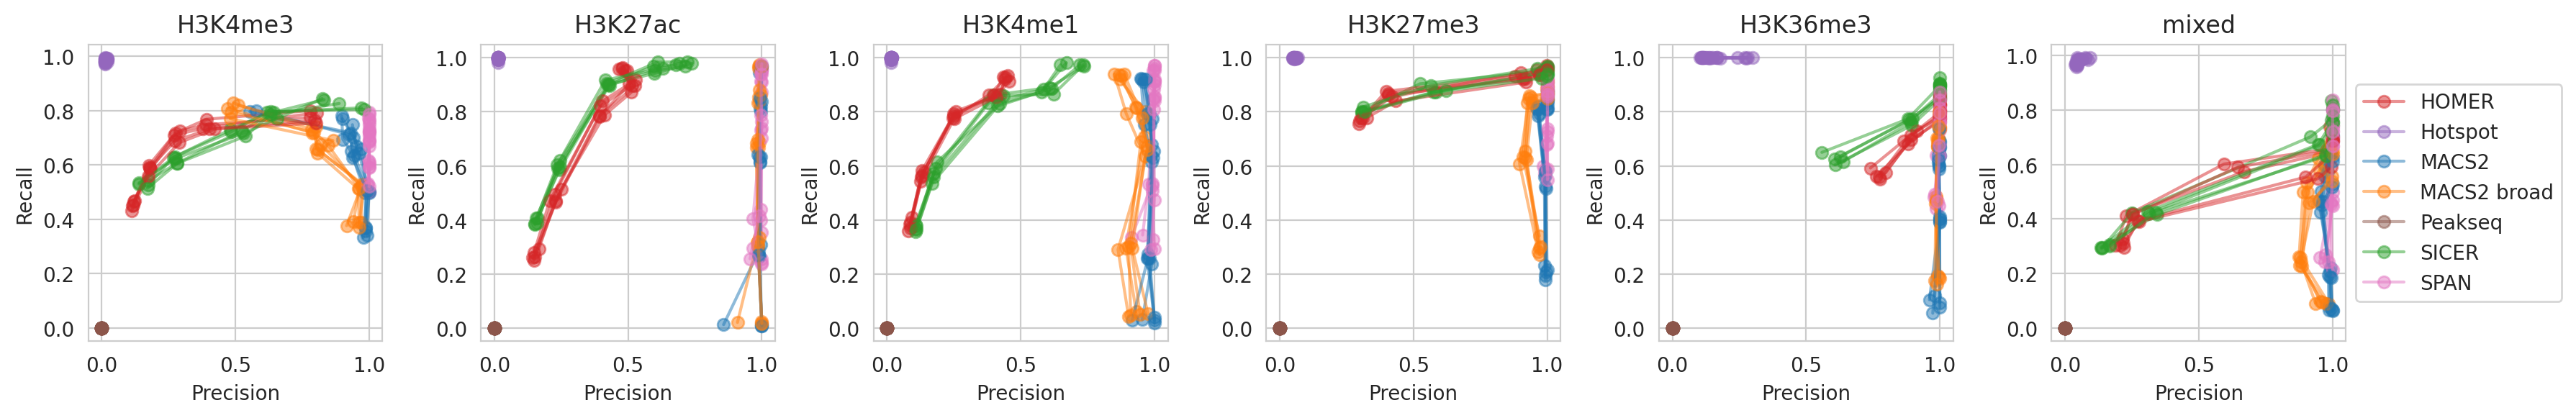

In [37]:
plt.figure(figsize=(18, 3))
axs = [plt.subplot(1, 6, i + 1) for i in range(6)]
labels = []  # Hack to add labels only once
for i, m in enumerate(tqdm(['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'])):
    ax = axs[i]
    for (n, tool), dft in df_peaks[df_peaks['modification'] == m].groupby(['n', 'tool']):
        if m == 'mixed' and tool not in labels:
            ax.plot(dft['Precision'], dft['Recall'], marker='o', label=tool, color=TOOLS_PALETTE[tool], alpha=0.5)
            labels.append(tool)
        else:
            ax.plot(dft['Precision'], dft['Recall'], marker='o', color=TOOLS_PALETTE[tool], alpha=0.5)
        ax.set_xlabel('Precision')
        ax.set_ylabel('Recall')
        ax.set_title(f'{m}')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, f'auc.pdf'), bbox_inches='tight', dpi=300)
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

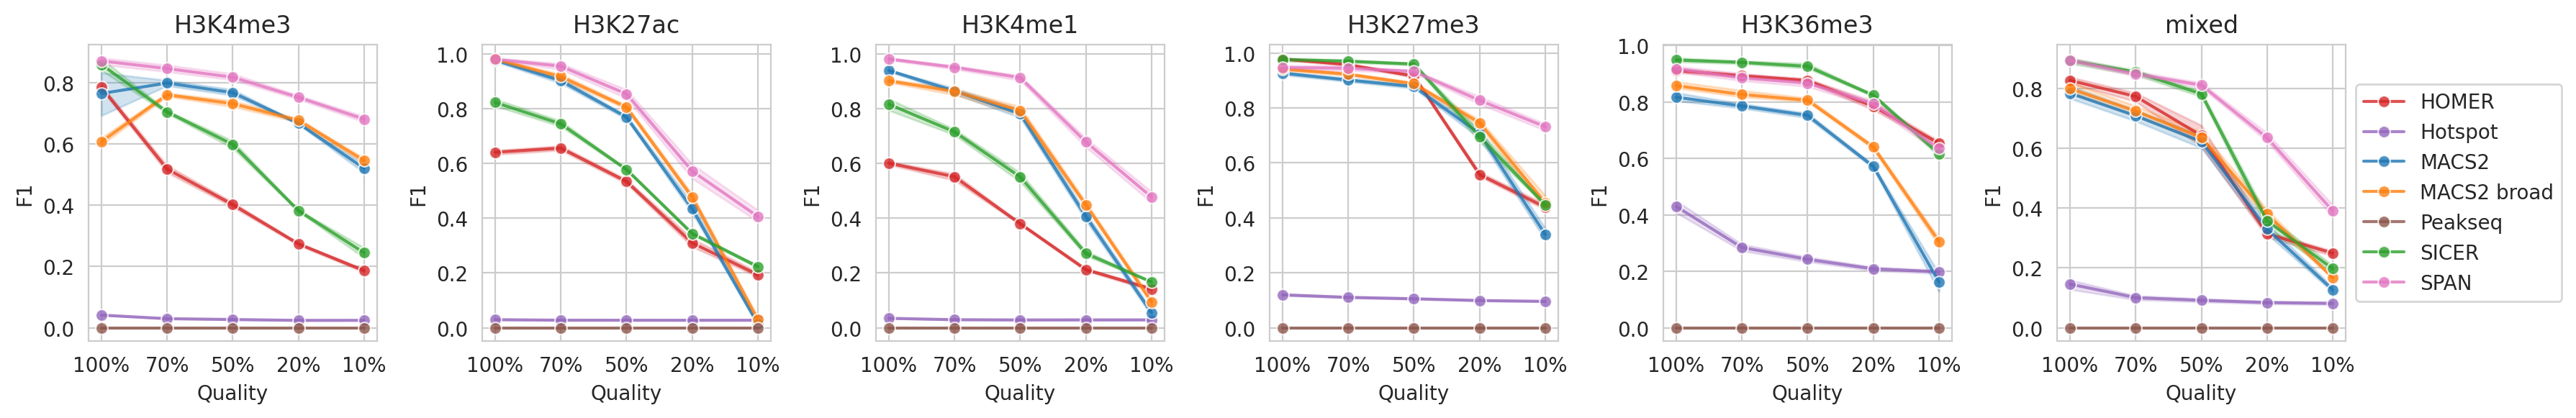

In [38]:
plt.figure(figsize=(18, 3))
axs = [plt.subplot(1, 6, i + 1) for i in range(6)]
labels = []  # Hack to add labels only once 
for i, m in enumerate(tqdm(['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'])):
    ax = axs[i]
    for tool, dft in df_peaks[df_peaks['modification'] == m].groupby('tool'):
        if m == 'mixed' and tool not in labels:
            sns.lineplot(dft, x='quality', y='F1', marker='o', label=tool, color=TOOLS_PALETTE[tool], alpha=0.8, ax=ax)
            labels.append(tool)
        else:
            sns.lineplot(dft, x='quality', y='F1', marker='o', label=tool, color=TOOLS_PALETTE[tool], alpha=0.8, ax=ax)
    ax.set_xlabel('Quality')
    ax.set_ylabel('F1')
    ax.set_title(f'{m}')
    # Put a legend to the right of the current axis
    if i == 5:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))        
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'auc.pdf'), bbox_inches='tight', dpi=300)
plt.show()

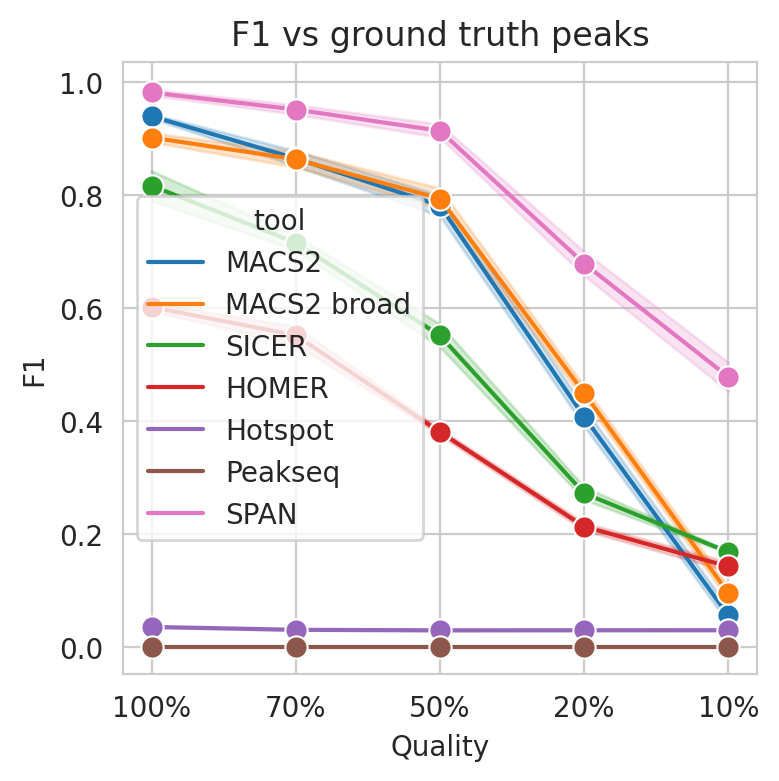

In [39]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=df_peaks[df_peaks['modification'] == 'H3K4me1'], x="quality", y="F1", hue='tool',
             hue_order=TOOLS,
             palette=TOOLS_PALETTE,
             errorbar='sd', marker='o', markersize=8)
plt.title('F1 vs ground truth peaks')
plt.xlabel('Quality')
plt.ylabel('F1')
plt.tight_layout()
plt.show()

In [40]:
t = []
for (m, n, tool), dft in tqdm(list(df_peaks0[df_peaks0['quality'] != '0%'].groupby(['modification', 'n', 'tool']))):
    aj = 0
    mprev = 0
    f1prev = 0
    for _, row in dft.sort_values(by=['multiplier']).iterrows():
        aj += (row['multiplier'] - mprev) * (row['F1'] + f1prev) / 2
        mprev, f1prev = row['multiplier'], row['F1']
    t.append((m, n, tool, aj))
dff1auc = pd.DataFrame(data=t, columns=['modification', 'n', 'tool', 'AUC'])
dff1auc.sample(3)

  0%|          | 0/210 [00:00<?, ?it/s]

modification  n     tool       AUC
109      H3K4me1  1  Peakseq  0.000000
6        H3K27ac  1     SPAN  0.752125
99      H3K36me3  5  Hotspot  0.240137

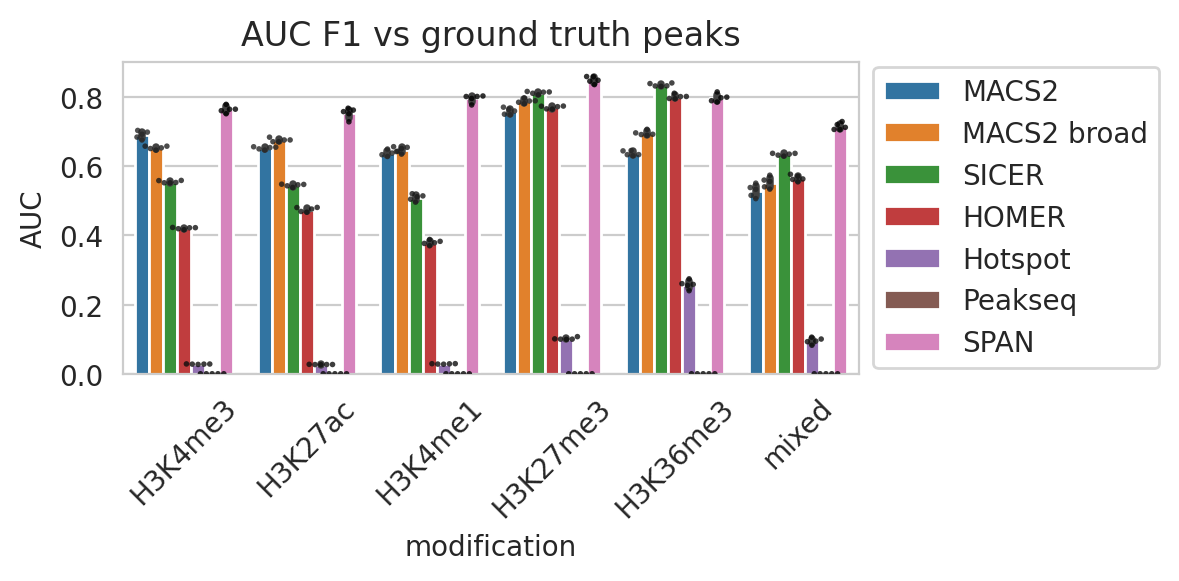

In [41]:
plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.title.set_text('AUC F1 vs ground truth peaks')
sns.barplot(data=dff1auc, x='modification', y='AUC',hue='tool',
            # capsize=.05, err_kws={'linewidth': 2},
            palette=TOOLS_PALETTE,
            order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
            hue_order=TOOLS,
            ax=ax)
sns.swarmplot(data=dff1auc, x='modification', y='AUC',hue='tool',
              dodge=True, size=2, color="black", alpha=0.8,
              palette="dark:black",
              order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
              hue_order=TOOLS, legend=False,
              ax=ax)
ax.xaxis.set_tick_params(rotation=45)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'jaccard_auc2.pdf'), bbox_inches='tight', dpi=300)
plt.show()

# Overlap vs 100% quality peaks

In [42]:
rows = []
tf = tempfile.mktemp()
for (m, n, t), dft in tqdm(df_peaks.groupby(['modification', 'n', 'tool'])):
    print(m, n, t)
    peaks_file100 = dft[dft['multiplier'] == 1.0]['file'].values[0]
    for _, (file, mult) in dft[dft['multiplier'] != 1.0][['file', 'multiplier']].iterrows():
        peaks100 = lines(peaks_file100)
        length100 = bedl(peaks_file100).sum()
        peaks = lines(file)
        length = bedl(file).sum()
        peaks_file100_s = sorted_file(peaks_file100)
        file_s = sorted_file(file)
        !bedtools intersect -a {peaks_file100_s} -b {file_s} -wa -u > {tf}
        overlap100 = lines(tf)
        !bedtools intersect -b {peaks_file100_s} -a {file_s} -wa -u > {tf}
        overlap = lines(tf)
        !bedtools intersect -a {peaks_file100_s} -b {file_s} -wo > {tf}
        overlap_len = int(last_col(tf).sum())
        rows.append((m, n, t, mult, peaks_file100, peaks100, length100, peaks, length, overlap100, overlap, overlap_len))

overlap100_df = pd.DataFrame(rows, columns=['modification', 'n', 'tool', 'multiplier',
                             'peaks_file100', 'peaks100', 'length100',
                             'peaks', 'length',
                             'overlap100', 'overlap', 'overlap_len'])
del rows

overlap100_df['Precision'] = overlap100_df['overlap'] / overlap100_df['peaks']
overlap100_df['Recall'] = overlap100_df['overlap100'] / overlap100_df['peaks100']
overlap100_df['F1'] = [2 / (1 / p + 1 / r) if min(p, r) > 0 else 0 for p, r in zip(overlap100_df['Precision'], overlap100_df['Recall'])]
overlap100_df['Jaccard'] = overlap100_df['overlap_len'] / (overlap100_df['length100'] + overlap100_df['length'] - overlap100_df['overlap_len'])
overlap100_df['quality'] = [f'{int(m * 100)}%' for m in overlap100_df['multiplier']]

overlap100_df.sample(3)

  0%|          | 0/210 [00:00<?, ?it/s]

H3K27ac 1 HOMER
H3K27ac 1 Hotspot
H3K27ac 1 MACS2
H3K27ac 1 MACS2 broad
H3K27ac 1 Peakseq
Error: unable to open file or unable to determine types for file /tmp/tmplny_o5xn

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).
Error: unable to open file or unable to determine types for file /tmp/tmplny_o5xn

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).
Error: unable to open file or unable to determine types for file /tmp/tmplny_o5xn

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).
Error: unable to open file or unable to determine types for file /tmp/tmpvqkrlc8n

- Please

modification  n         tool  multiplier  \
527      H3K4me1  4        SICER         0.1   
686      H3K4me3  5  MACS2 broad         0.2   
221     H3K27me3  3         SPAN         0.5   

                                         peaks_file100  peaks100  length100  \
527  /home/jetbrains/data/2023_chips/sicer/H3K4me1_...       751    1239849   
686  /home/jetbrains/data/2023_chips/macs2/H3K4me3_...       801     614445   
221  /home/jetbrains/data/2023_chips/span/H3K27me3_...       467    2261345   

     peaks     length  overlap100  overlap  overlap_len  Precision    Recall  \
527   1728  2766672.0         209      209       397791   0.120949  0.278296   
686    271   407576.0         256      260       403163   0.959410  0.319600   
221    466  2658500.0         430      435      2243385   0.933476  0.920771   

           F1   Jaccard quality  
527  0.168616  0.110230     10%  
686  0.479477  0.651463     20%  
221  0.927080  0.838191     50%

In [43]:
overlap100_df0 = overlap100_df.copy()
# Add 1.0 and 0.0 multiplier
for m, n, tool in product(['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'], range(1, 6), TOOLS):
    row = [m, n, tool, 0.0] + [None] * (len(overlap100_df0.columns) - 4)
    overlap100_df0.loc[len(overlap100_df0)] = row
    row = [m, n, tool, 1.0] + [None] * (len(overlap100_df0.columns) - 4)
    overlap100_df0.loc[len(overlap100_df0)] = row
    
overlap100_df0.loc[overlap100_df0['multiplier'] == 0, 'quality'] = '0%'
overlap100_df0.loc[overlap100_df0['multiplier'] == 1.0, 'quality'] = '100%'
overlap100_df0.loc[overlap100_df0['multiplier'] == 0, 'Jaccard'] = 0
overlap100_df0.loc[overlap100_df0['multiplier'] == 1.0, 'Jaccard'] = 1
overlap100_df0.sort_values(by=['modification', 'n', 'tool', 'multiplier'], ascending=False, inplace=True)
overlap100_df0.tail(3)

modification  n   tool  multiplier  \
2        H3K27ac  1  HOMER         0.2   
3        H3K27ac  1  HOMER         0.1   
916      H3K27ac  1  HOMER         0.0   

                                         peaks_file100 peaks100 length100  \
2    /home/jetbrains/data/2023_chips/homer/H3K27ac_...     1006   1037807   
3    /home/jetbrains/data/2023_chips/homer/H3K27ac_...     1006   1037807   
916                                               None     None      None   

    peaks    length overlap100 overlap overlap_len Precision    Recall  \
2    1052  829350.0        250     259      398937  0.246198  0.248509   
3    1080  643839.0        143     174      156415  0.161111  0.142147   
916  None      None       None    None        None      None      None   

           F1   Jaccard quality  
2    0.247348  0.271715     20%  
3    0.151036  0.102552     10%  
916      None         0      0%

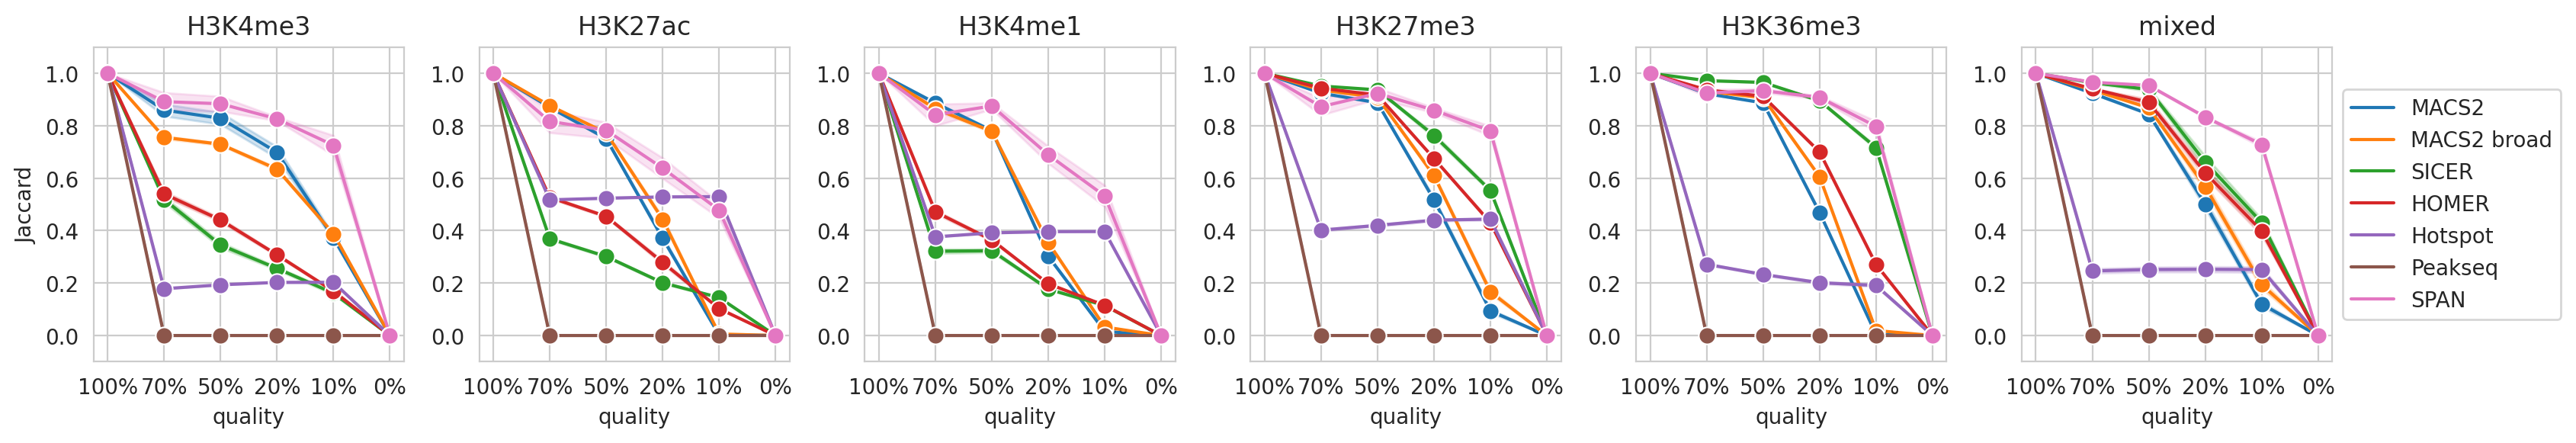

In [44]:
plt.figure(figsize=(17, 3))
axs = [plt.subplot(1, 6, i + 1) for i in range(6)]
for i, m in enumerate(['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed']):
    ax = axs[i]
    sns.lineplot(data=overlap100_df0[(overlap100_df0['modification'] == m) &
                                     (overlap100_df0['tool'] != 'SPAN')], x="quality", y="Jaccard", hue='tool', ax=ax,
                 hue_order=TOOLS,
                 palette=TOOLS_PALETTE,
                 errorbar='se',
                 marker='o', markersize=8)
    sns.lineplot(data=overlap100_df0[(overlap100_df0['modification'] == m) &
                                     (overlap100_df0['tool'] == 'SPAN')], x="quality", y="Jaccard", hue='tool', ax=ax,
                 hue_order=TOOLS,
                 palette=TOOLS_PALETTE, legend=False,
                 errorbar='se',
                 marker='o', markersize=8)
    
    ax.set_title(f'{m}')
    ax.set_ylim([-0.1, 1.1])
    # Put a legend to the right of the current axis
    if i == 5:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
    if i > 0:
        ax.set_ylabel(None)
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'jaccard2.pdf'), bbox_inches='tight', dpi=300)
plt.show()

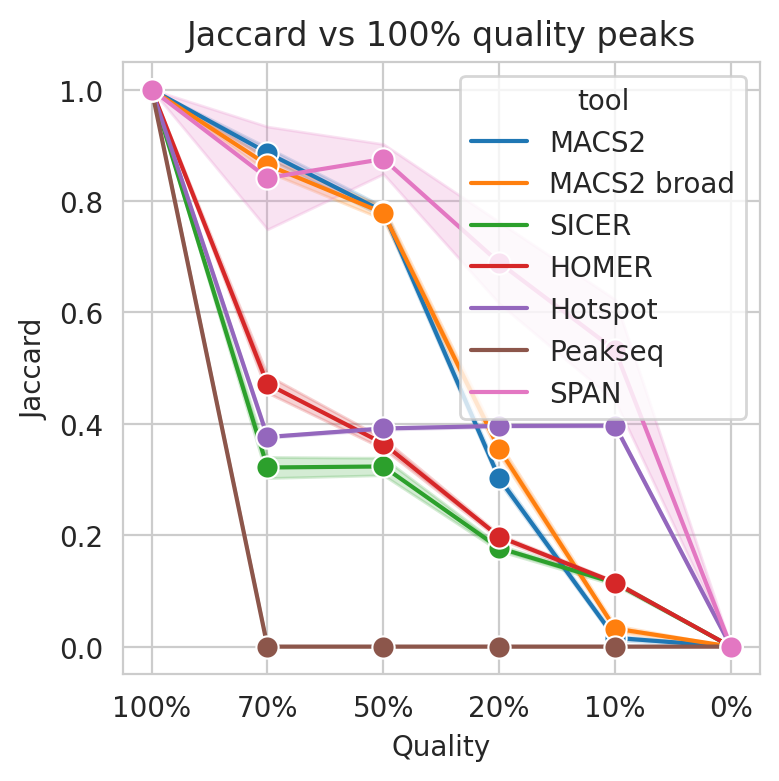

In [45]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=overlap100_df0[overlap100_df0['modification'] == 'H3K4me1'], x="quality", y="Jaccard", hue='tool',
             hue_order=TOOLS,
             palette=TOOLS_PALETTE,
             errorbar='sd', marker='o', markersize=8)
plt.title('Jaccard vs 100% quality peaks')
plt.xlabel('Quality')
plt.ylabel('Jaccard')
plt.tight_layout()
plt.show()

In [46]:
t = []
for (m, n, tool), dft in tqdm(list(overlap100_df0[overlap100_df0['quality'] != '0%'].groupby(['modification', 'n', 'tool']))):
    aj = 0
    mprev = 0
    jprev = 0
    for _, row in dft.sort_values(by=['multiplier']).iterrows():
        aj += (row['multiplier'] - mprev) * (row['Jaccard'] + jprev) / 2
        mprev, jprev = row['multiplier'], row['Jaccard']
    t.append((m, n, tool, aj))
dfjaccardauc100 = pd.DataFrame(data=t, columns=['modification', 'n', 'tool', 'AUC'])
dfjaccardauc100.sample(3)

  0%|          | 0/210 [00:00<?, ?it/s]

modification  n     tool       AUC
180        mixed  1    SICER  0.802168
207        mixed  5  Peakseq  0.150000
53      H3K27me3  3  Peakseq  0.150000

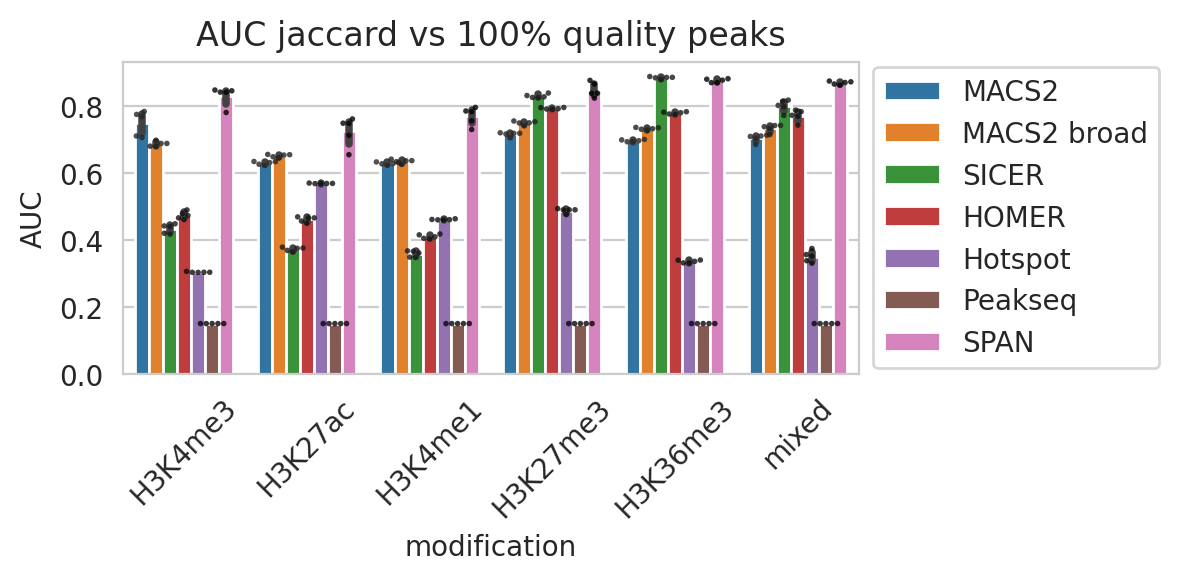

In [47]:
plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.title.set_text('AUC jaccard vs 100% quality peaks')
sns.barplot(data=dfjaccardauc100, x='modification', y='AUC', hue='tool',
            # capsize=.05, err_kws={'linewidth': 2},
            palette=TOOLS_PALETTE,
            order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
            hue_order=TOOLS,
            ax=ax)
sns.swarmplot(data=dfjaccardauc100, x='modification', y='AUC', hue='tool',
              dodge=True, size=2, color="black", alpha=0.8, palette='dark:black',
              order=['H3K4me3', 'H3K27ac', 'H3K4me1', 'H3K27me3', 'H3K36me3', 'mixed'],
              hue_order=TOOLS, legend=False,
              ax=ax)
ax.xaxis.set_tick_params(rotation=45)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(os.path.join(FIGURES_DIR, f'jaccard_auc2.pdf'), bbox_inches='tight', dpi=300)
plt.show()

In [48]:
dfjaccardauc100[(dfjaccardauc100['modification'] == 'mixed') & (dfjaccardauc100['tool'] == 'SPAN')]

modification  n  tool       AUC
181        mixed  1  SPAN  0.865962
188        mixed  2  SPAN  0.862444
195        mixed  3  SPAN  0.870481
202        mixed  4  SPAN  0.874939
209        mixed  5  SPAN  0.872564

# END